In [49]:
import numpy as np 
import os 
import xarray as xr
import pandas as pd

#from scipy.io import savemat
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib as mpl

In [ ]:
max_display_options = ['display.max_seq_items', 'display.max_colwidth', 'display.max_dir_items', 'display.max_columns', 'display.max_rows']
for param in range(0,len(max_display_options)):
    pd.set_option(max_display_options[param], None)

In [50]:
pd.set_option('display.max_rows',100)

In [51]:
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.reset_index(inplace=True)
df_alldays.set_index('time_local', inplace=True, drop=False)

In [52]:
# Define which variables we need to make sure don't have Nans/ negs since we'll be using then as constraints in F0AM: 
# True means constrain
need2fill= {'Br2_CIMS':True,
        'BrO_CIMS':True,
        'Cl2_CIMS':True,
        'ClNO2_CIMS':True,
        'BrCl_CIMS':True,
        'NCl3_CIMS':False,
        'File_Index':False,
        'NO_LIF':True,
        'NO2_LIF':True,
        'NOy_LIF':False,
        'ACCURACY_1sigma_NO':False,
        'ACCURACY_1sigma_NO2':False,
        'ACCURACY_1sigma_NOy':False,
        'N2O5_CIMS':True,
        'C4H7NO5_CIMS':False,
        'ISOPN_CIMS':False,
        'C5H10O3_CIMS':False,
        'C5H9NO5_CIMS':False,
        'C10H17NO4_CIMS':False,
        'HNO3_CIMS':True,
        'Methanol_PTR':True,
        'Acetonitrile_PTR':True,
        'Acetaldehyde_PTR':True,
        'Ethanol_PTR':True,
        'Methanethiol_PTR':False,
        'Acrolein_PTR':True,
        'Acetone_Propanal_PTR':False,
        'DMS_PTR':True,
        'Isoprene_PTR':True,
        'MVK_MACR_PTR':True,
        'Benzene_PTR':True,
        'Toluene_PTR':True,
        'Styrene_PTR':True,
        'Benzaldehyde_PTR':False,
        'C8Aromatics_PTR':False,
        'C9Aromatics_PTR':False,
        'Naphthalene_PTR':False,
        'Octanal_PTR':False,
        'Monoterpenes_PTR':True,
        'Nonanal_PTR':False,
        'C7H4ClF3_PTR':False,
        'D5_siloxane_PTR':False,
        'PAN_CIMS':True,
        'APAN_CIMS':False,
        'PPN_CIMS':True,
        'HCOOH_CIMS':True,
        'HONO_CIMS':True,
        'O3_ppbv':True,
        'Altitude_m':False,
        'Course_deg':False,
        'GndSpd_ms':False,
        'Heading_deg':False,
        'Lat':False,
        'Lon':False,
        'Temp_K':True,
        'Pressure_mb':True,
        'WindDir_deg':False,
        'WindSpd_ms':True,
        'jNO2_meas':True,
        'CO2_Piccaro':False,
        'CH4_Piccaro':True,
        'CO_Piccaro':True,
        'H2O_Piccaro':False,
        'HCHO_CRDS':True,
        'H2O_CRDS':True,
        'CH4_CRDS':True,
        'Time_Start_WAS':False,
        'Time_Stop_WAS':False,
        'Time_Mid_WAS':False,
        'Acetone_WAS':False,
        'Acrolein_WAS':False,
        'Benzene_WAS':False,
        'C2Cl4_WAS':False,
        'C2HCl3_WAS':False,
        'CCl4_WAS':False,
        'CF2Cl2_WAS':False,
        'CFCl3_WAS':False,
        'CH2Cl2_WAS':False,
        'CH3Br_WAS':False,
        'CycloPentane_WAS':False,
        'Ethyl_WAS':False,
        'Ethane_WAS':False,
        'Ethene_WAS':False,
        'Ethyne_WAS':False,
        'Furan_WAS':False,
        'Isoprene_WAS':False,
        'Limonene_WAS':False,
        'MACR_WAS':False,
        'MethylCycloHexane_WAS':False,
        'MethylCycloPentane_WAS':False,
        'Propane_WAS':False,
        'Propene_WAS':False,
        'Toluene_WAS':False,
        'Alpha_Pinene_WAS':False,
        'Beta_Pinene_WAS':False,
        'c2Butene_WAS':False,
        'c2Pentene_WAS':False,
        'iButane_WAS':False,
        'iPentane_WAS':False,
        'iPropylBenzene_WAS':False,
        'iPropylONO2_WAS':False,
        'm_p_Xylene_WAS':False,
        'nButane_WAS':False,
        'nDecane_WAS':False,
        'nHeptane_WAS':False,
        'nHexane_WAS':False,
        'nNonane_WAS':False,
        'nOctane_WAS':False,
        'nPentane_WAS':False,
        'nPropylBenzene_WAS':False,
        'nPropylONO2_WAS':False,
        'o_Xylene_WAS':False,
        't2Butene_WAS':False,
        't2Pentene_WAS':False,
        'x123_TriMethylBenzene_WAS':False,
        'x124_TriMethylBenzene_WAS':False,
        'x135_TriMethylBenzene_WAS':False,
        'x13_Butadiene_WAS':False,
        'x1_Butene_WAS':False,
        'x1_Pentene_WAS':False,
        'x224_TriMethylPentane_WAS':False,
        'x22_DiMethylButane_WAS':False,
        'x2_EthylToluene_WAS':False,
        'x2_MethylPentane_WAS':False,
        'x3_MethylPentane_WAS':False,
        'x3_x4_EthylToluene_WAS':False,
        'RH_percent':True,
        'AOD':False}
        # 'jNO2':True,
        # 'jBrCl':True,
        # 'jBr2':True,
        # 'jCCl4':True,
        # 'jCH2Oa':True,
        # 'jCH2Ob':True,
        # 'jClNO2':True,
        # 'jClOa':True,
        # 'jClOb':True,
        # 'jCl2':True,
        # 'jHNO2':True,
        # 'jHNO3':True,
        # 'jI2':True,
        # 'jNO3a':True,
        # 'jNO3b':True,
        # 'jN2O5':True,
        # 'jO3':True,
        # 'Time_Start_POPS':False,
        # 'Time_Stop_POPS':False,
        # 'Press_mb_POPS':False,
        # 'Temp_C_POPS':False,
        # 'Aerosol_conc_POPS':False,
        # 'Surface_area_conc_POPS':False,
        # 'Volume_density_POPS':False,
        # 'Effective_radius_POPS':False,
        # 'Extinction_POPS':False,
        # 'Particle_conc_bin01_POPS':False,
        # 'Particle_conc_bin02_POPS':False,
        # 'Particle_conc_bin03_POPS':False,
        # 'Particle_conc_bin04_POPS':False,
        # 'Particle_conc_bin05_POPS':False,
        # 'Particle_conc_bin06_POPS':False,
        # 'Particle_conc_bin07_POPS':False,
        # 'Particle_conc_bin08_POPS':False,
        # 'Particle_conc_bin09_POPS':False,
        # 'Particle_conc_bin10_POPS':False,
        # 'Particle_conc_bin11_POPS':False,
        # 'Particle_conc_bin12_POPS':False,
        # 'Particle_conc_bin13_POPS':False,
        # 'Particle_conc_bin14_POPS':False,
        # 'Particle_conc_bin15_POPS':False,
        # 'Particle_conc_bin16_POPS':False,
        # 'Particle_conc_bin17_POPS':False,
        # 'Particle_conc_bin18_POPS':False,
        # 'Particle_conc_bin19_POPS':False,
        # 'Particle_conc_bin20_POPS':False,
        # 'Particle_conc_bin21_POPS':False,
        # 'Particle_conc_bin22_POPS':False,
        # 'Particle_conc_bin23_POPS':False,
        # 'Particle_conc_bin24_POPS':False,
        # 'Particle_conc_bin25_POPS':False,
        # 'Particle_conc_bin26_POPS':False,
        # 'Particle_conc_bin27_POPS':False,
        # 'Particle_conc_bin28_POPS':False,
        # 'Particle_conc_bin29_POPS':False,
        # 'Particle_conc_bin30_POPS':False,
        # 'Particle_conc_bin31_POPS':False,
        # 'Particle_conc_bin32_POPS':False,
        # 'Particle_conc_bin33_POPS':False,
        # 'Particle_conc_bin34_POPS':False,
        # 'Particle_conc_bin35_POPS':False,
        # 'Particle_conc_bin36_POPS':False}

# Get names of vars we need to fill nans in: 
vars2fill=[key for key,value in need2fill.items() if value ==True]

In [6]:
# Get a list of unique dates we have parked data for: 
all_dates=np.unique(df_alldays.index.date)

data_info=pd.DataFrame(index=all_dates)

# Loop over each individual date we had data on: 
for date in all_dates: 
    # Select ONLY times from this one day (locally): 
    df=df_alldays.loc[str(date)]
    for col in vars2fill:
        # Figure out how many bad pts there are to fill at this date/for this data: 
        data_info.at[date, col]= len([item for item in df[col] if item <0 or np.isnan(item)])
        
# Save info to a spreadsheet: 
data_info.to_csv('/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/USOS_nans_in_parked_data.csv')

## Smoke free days only (first F0AM run)

In [53]:
df_smokefree = df_alldays.sort_index().loc["2024-08-04 00:00:00":"2024-08-08 23:30:00"]

In [54]:
print(df_smokefree['time_local'], df_smokefree['time_UTC'])

time_local
2024-08-04 00:00:00   2024-08-04 00:00:00
2024-08-04 00:30:00   2024-08-04 00:30:00
2024-08-04 01:00:00   2024-08-04 01:00:00
2024-08-04 01:30:00   2024-08-04 01:30:00
2024-08-04 02:00:00   2024-08-04 02:00:00
                              ...        
2024-08-08 21:30:00   2024-08-08 21:30:00
2024-08-08 22:00:00   2024-08-08 22:00:00
2024-08-08 22:30:00   2024-08-08 22:30:00
2024-08-08 23:00:00   2024-08-08 23:00:00
2024-08-08 23:30:00   2024-08-08 23:30:00
Name: time_local, Length: 240, dtype: datetime64[ns] time_local
2024-08-04 00:00:00   2024-08-04 06:00:00
2024-08-04 00:30:00   2024-08-04 06:30:00
2024-08-04 01:00:00   2024-08-04 07:00:00
2024-08-04 01:30:00   2024-08-04 07:30:00
2024-08-04 02:00:00   2024-08-04 08:00:00
                              ...        
2024-08-08 21:30:00   2024-08-09 03:30:00
2024-08-08 22:00:00   2024-08-09 04:00:00
2024-08-08 22:30:00   2024-08-09 04:30:00
2024-08-08 23:00:00   2024-08-09 05:00:00
2024-08-08 23:30:00   2024-08-09 05:30:00
N

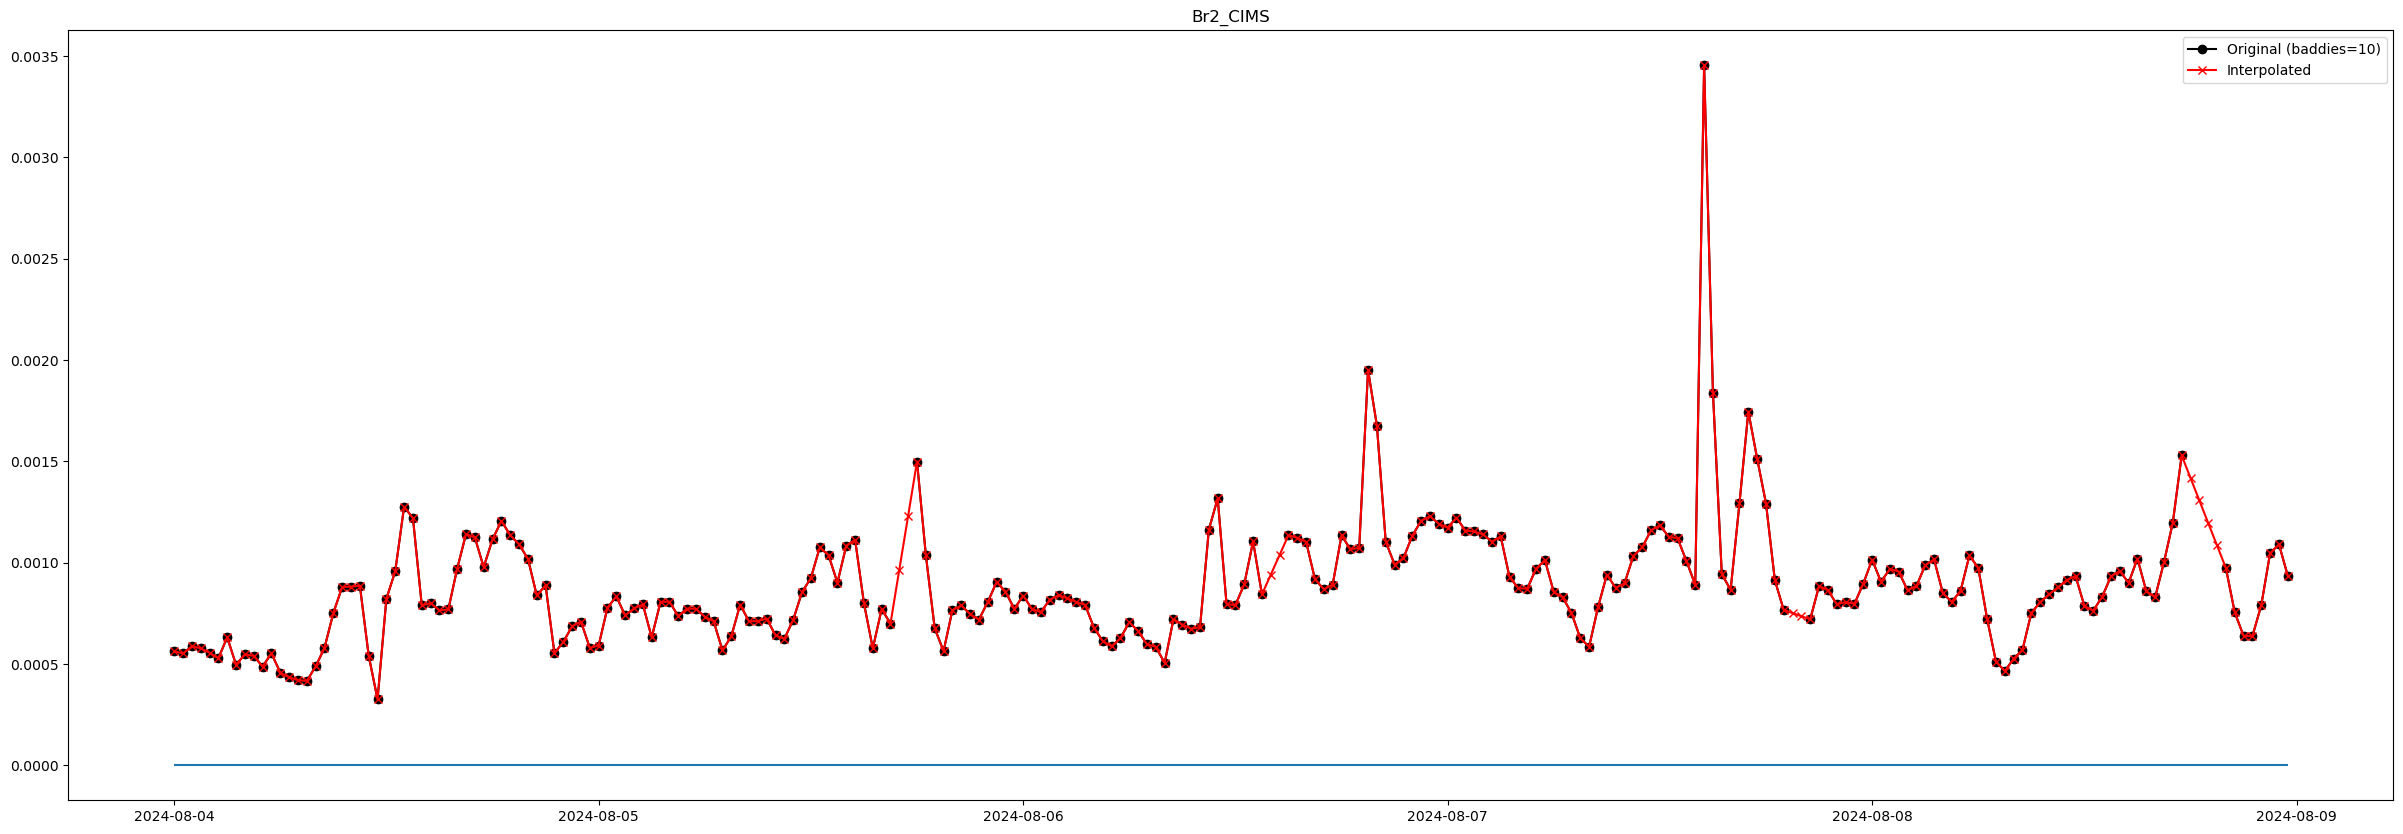

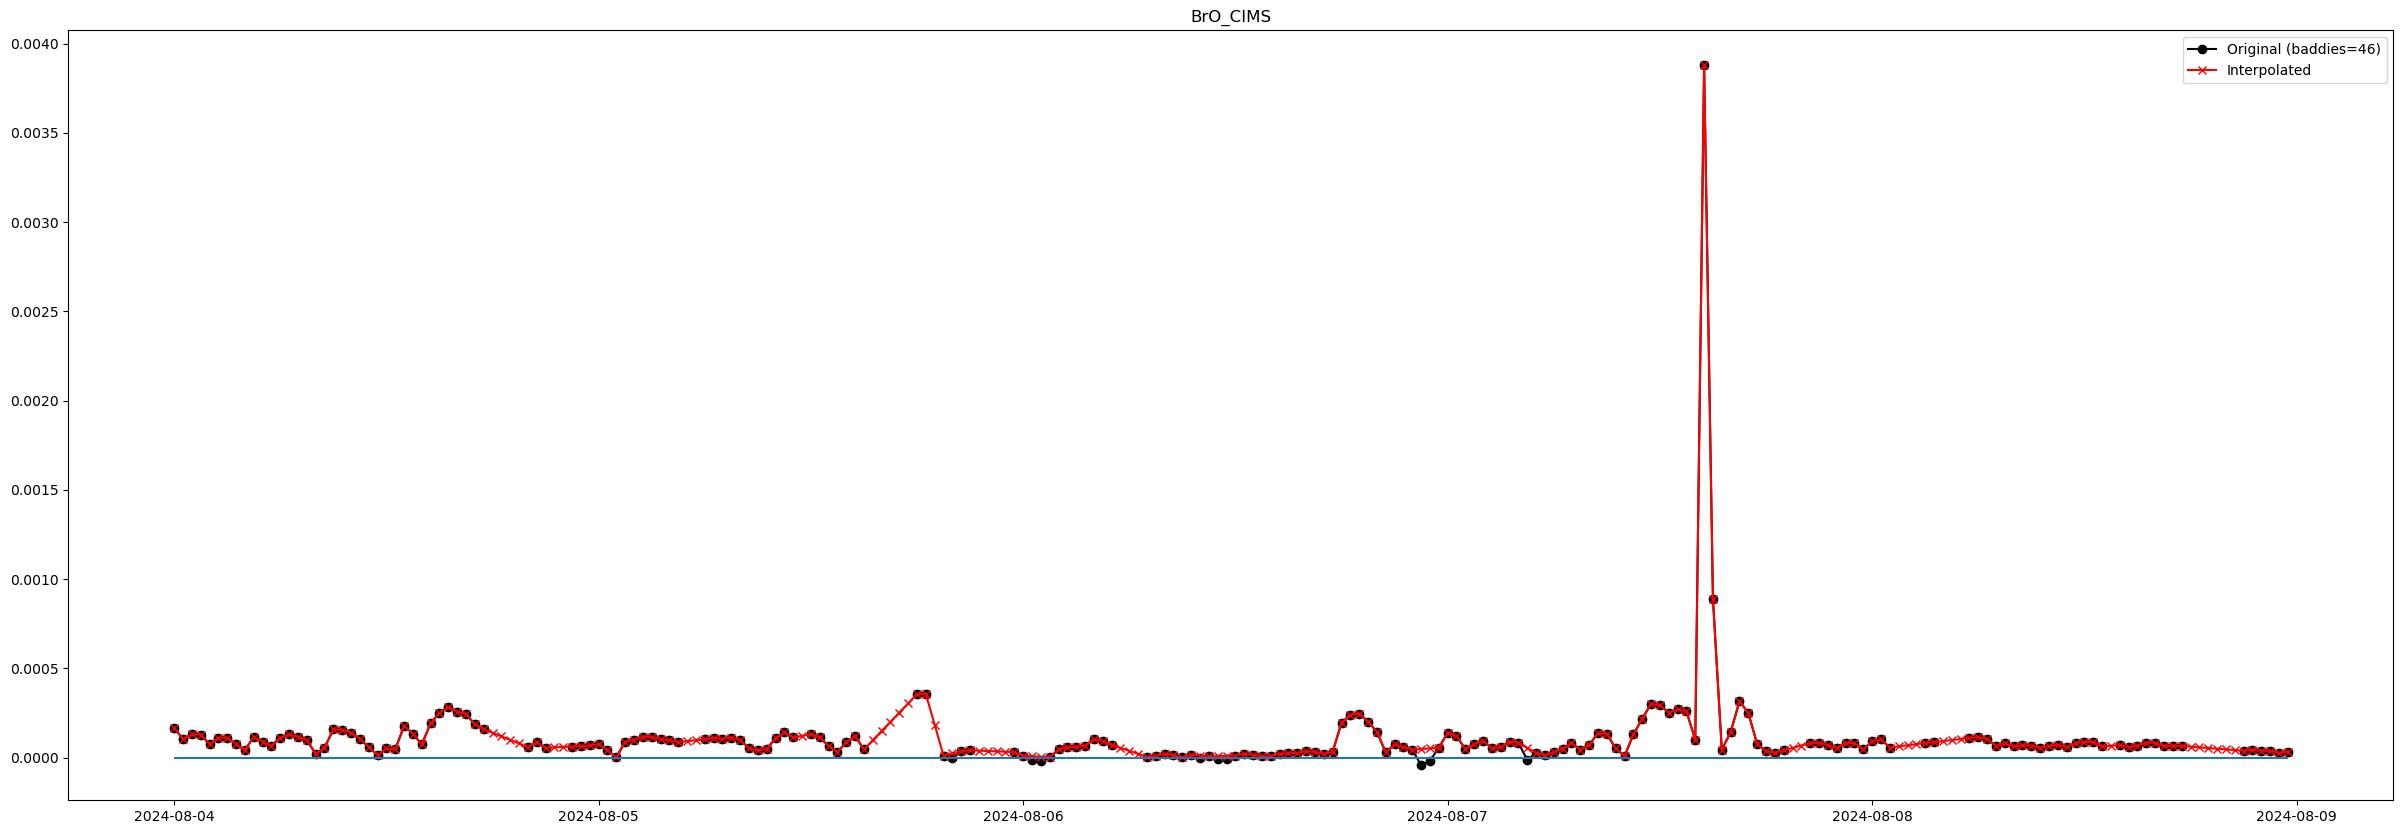

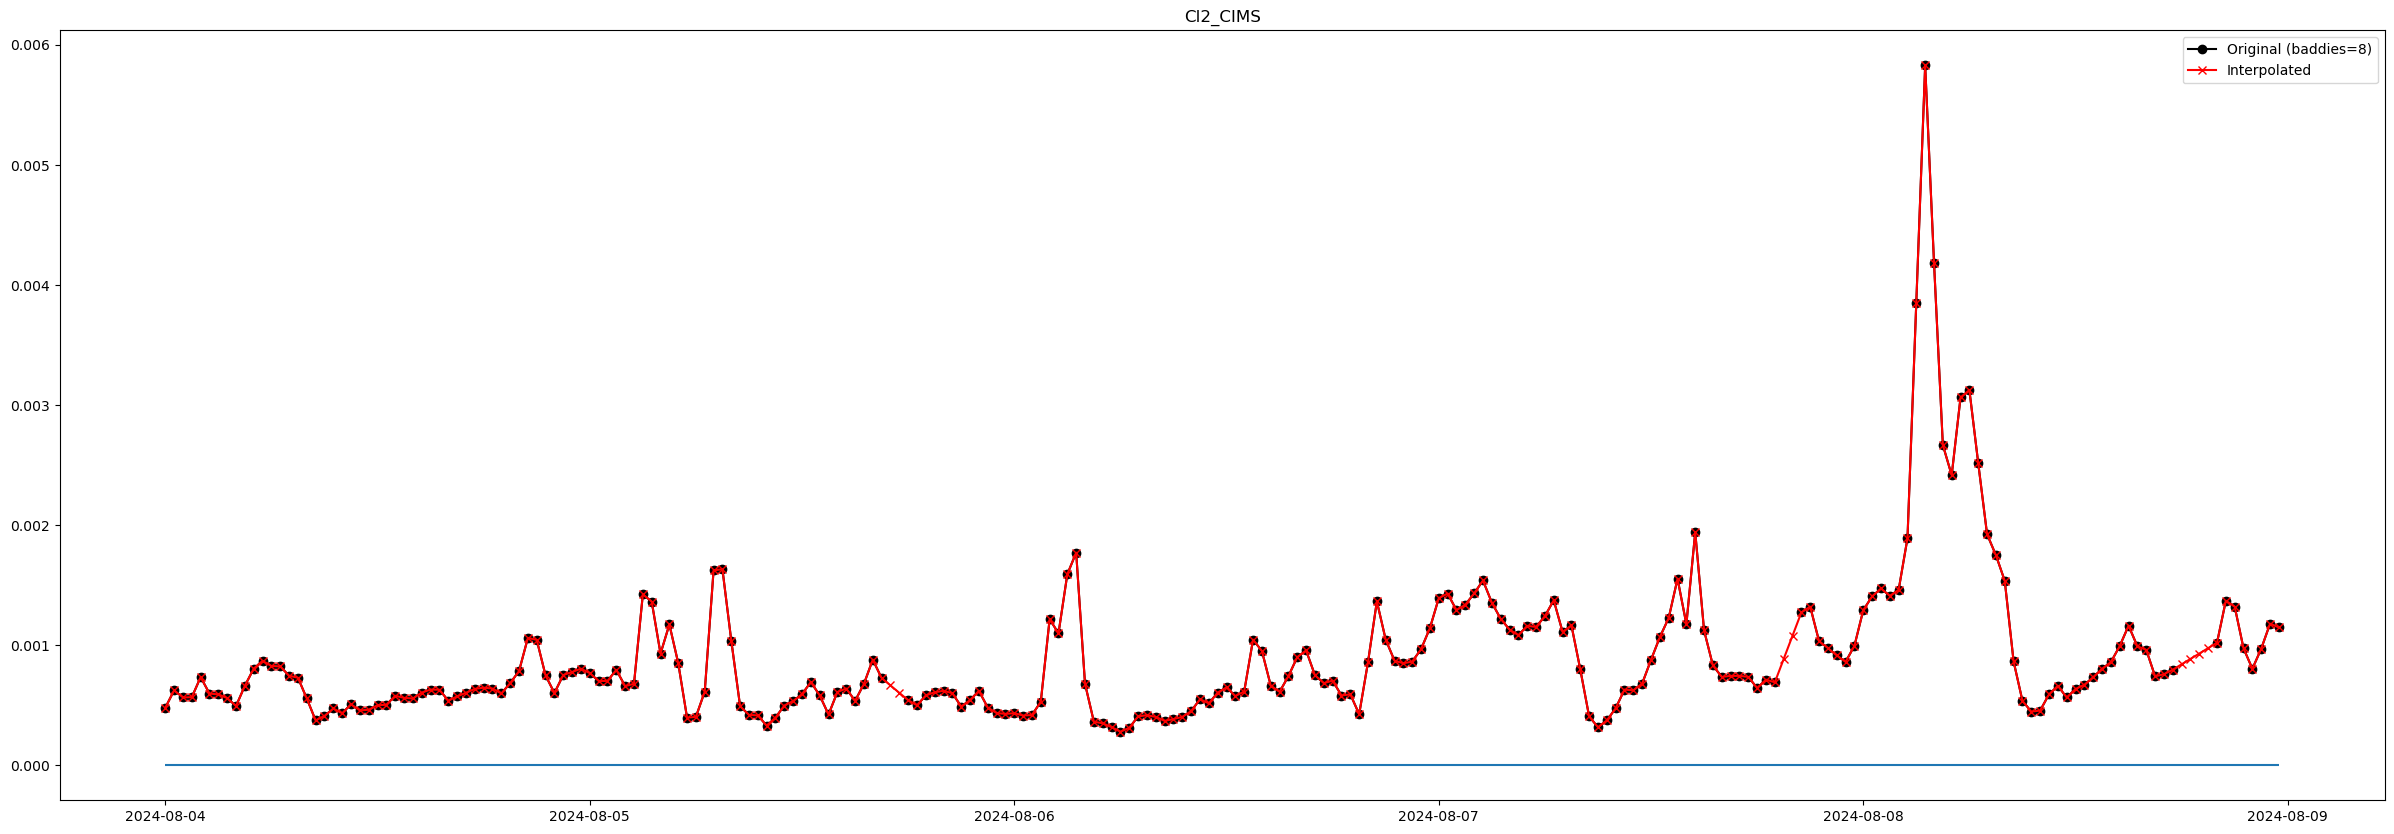

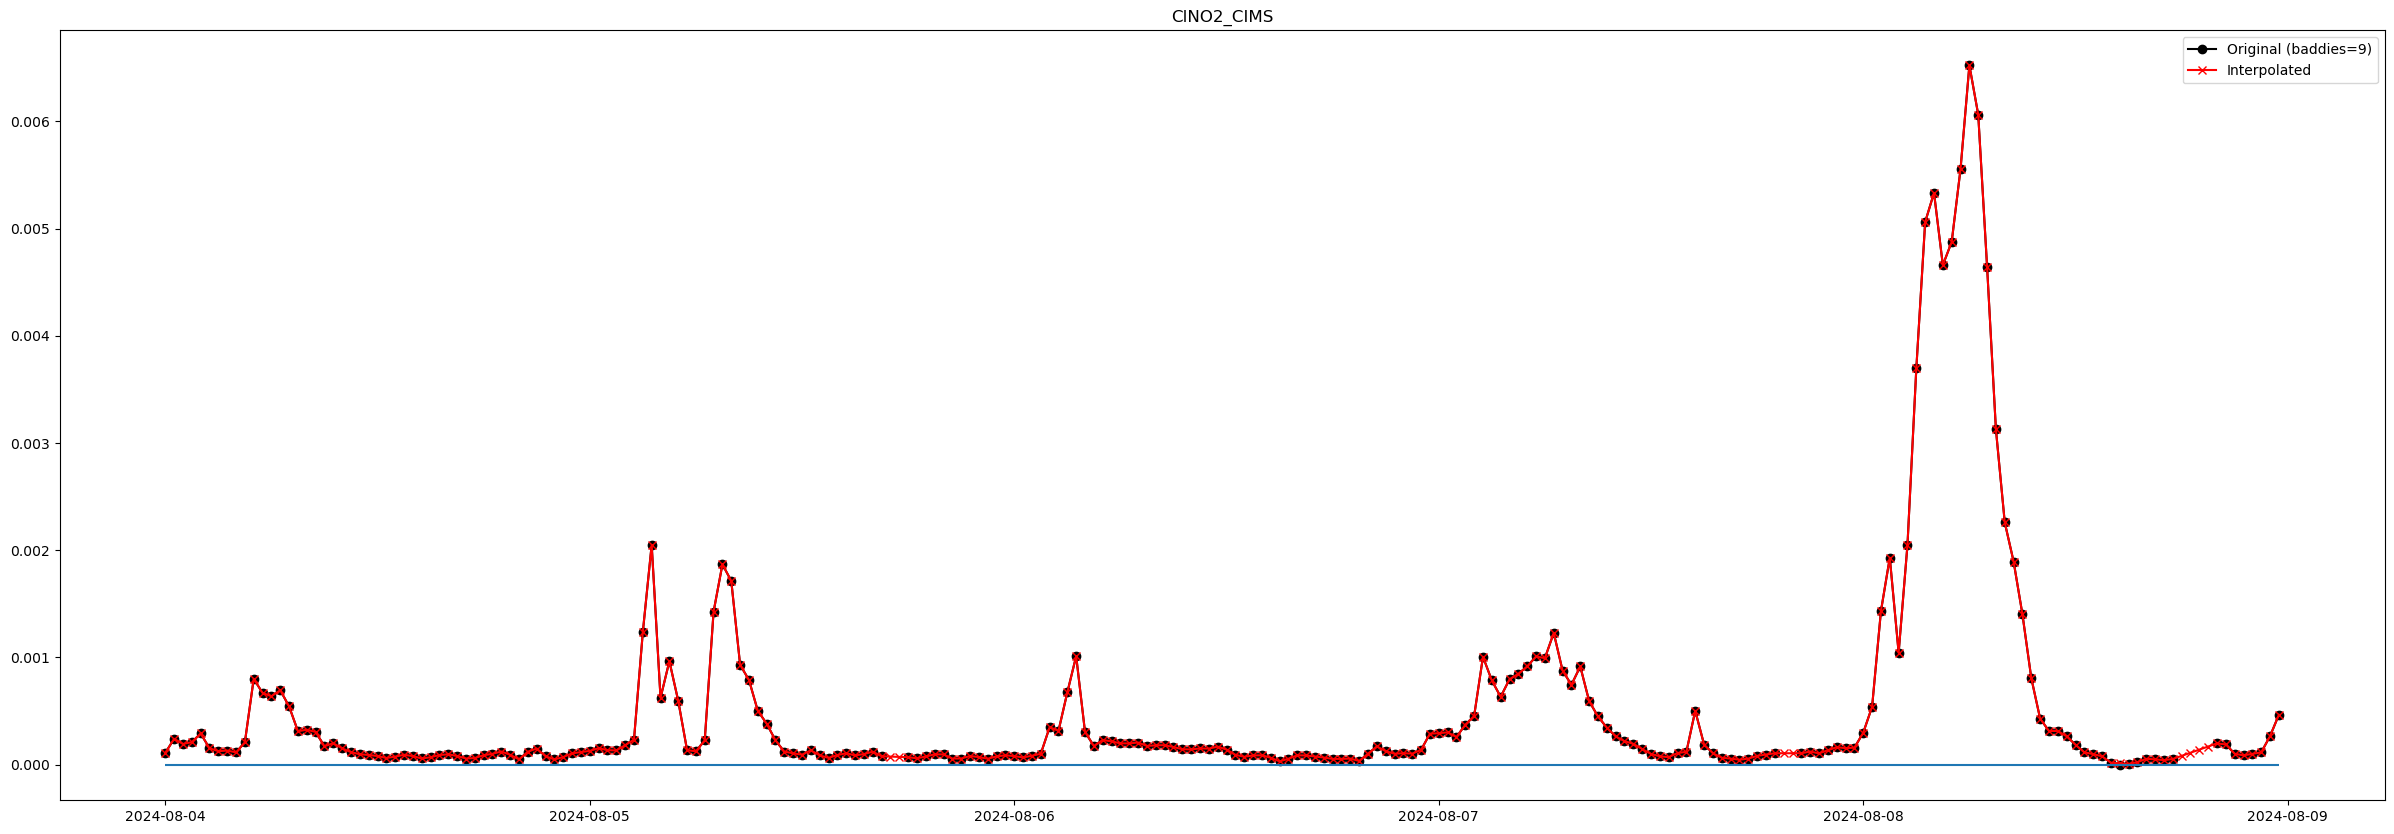

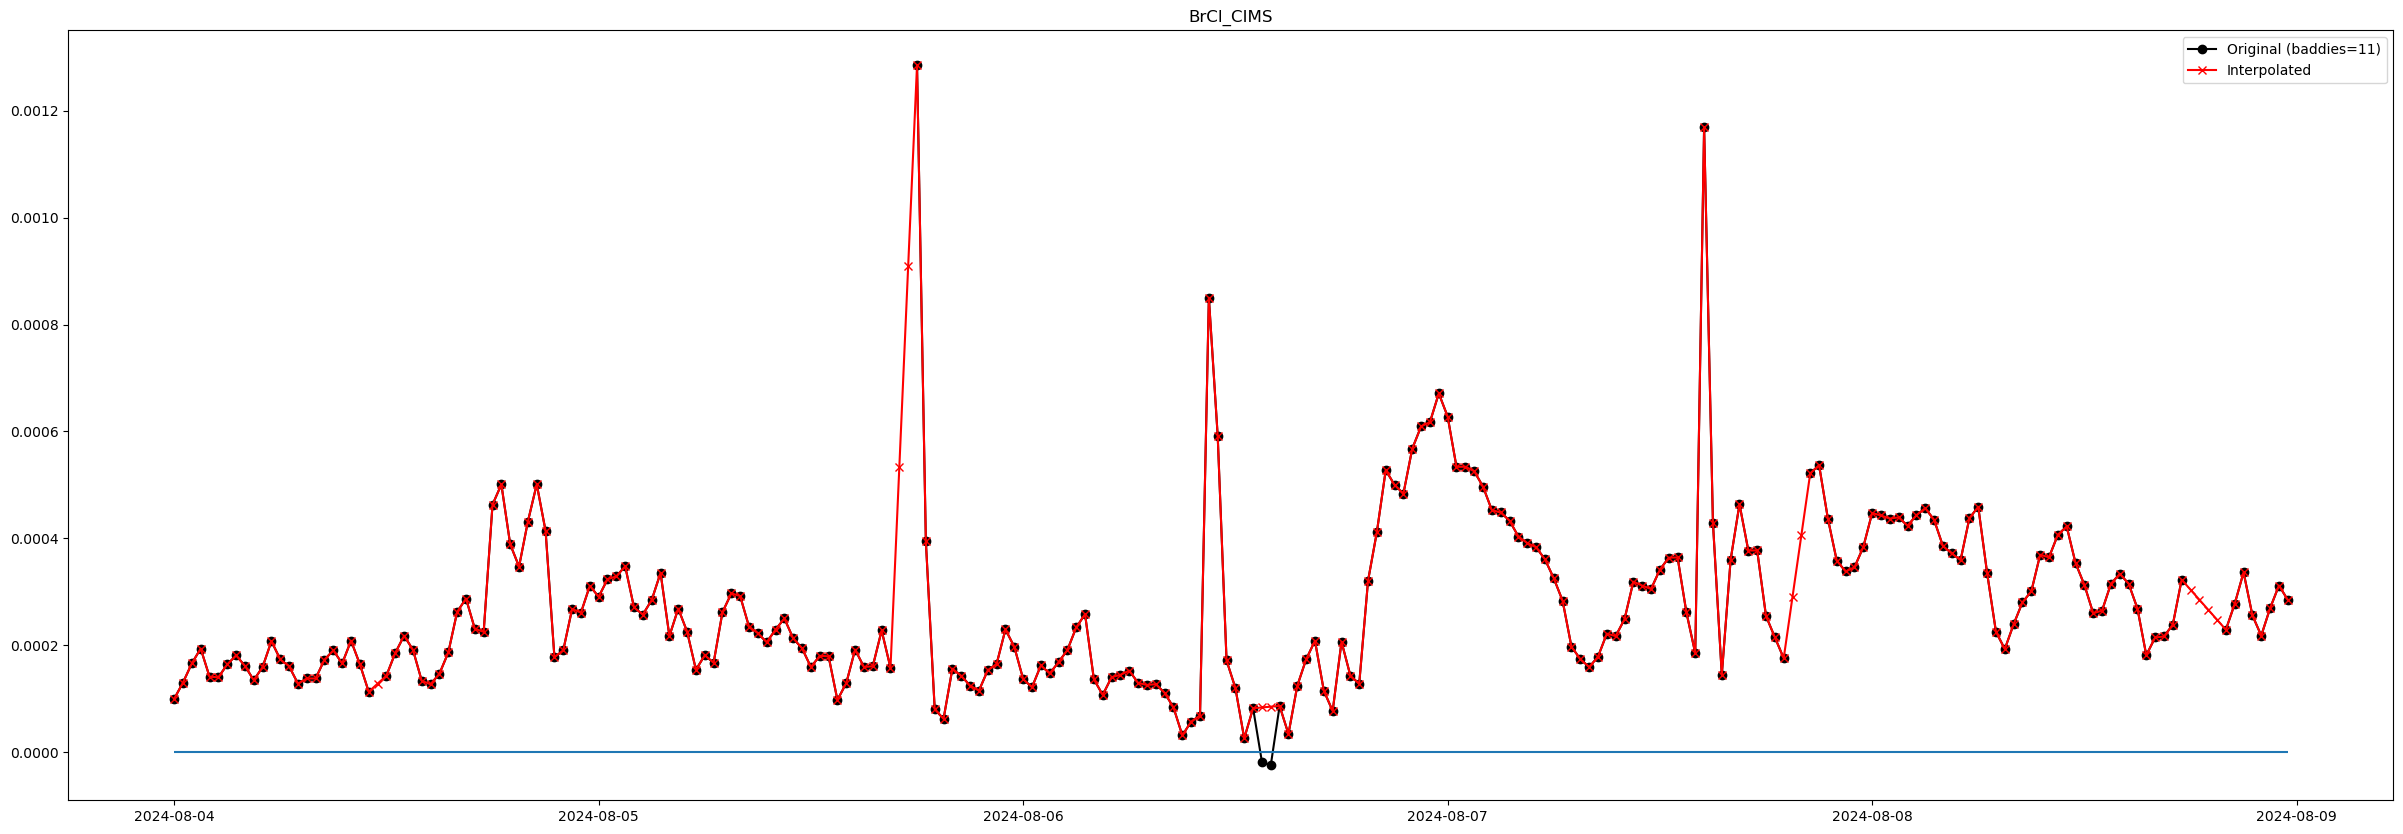

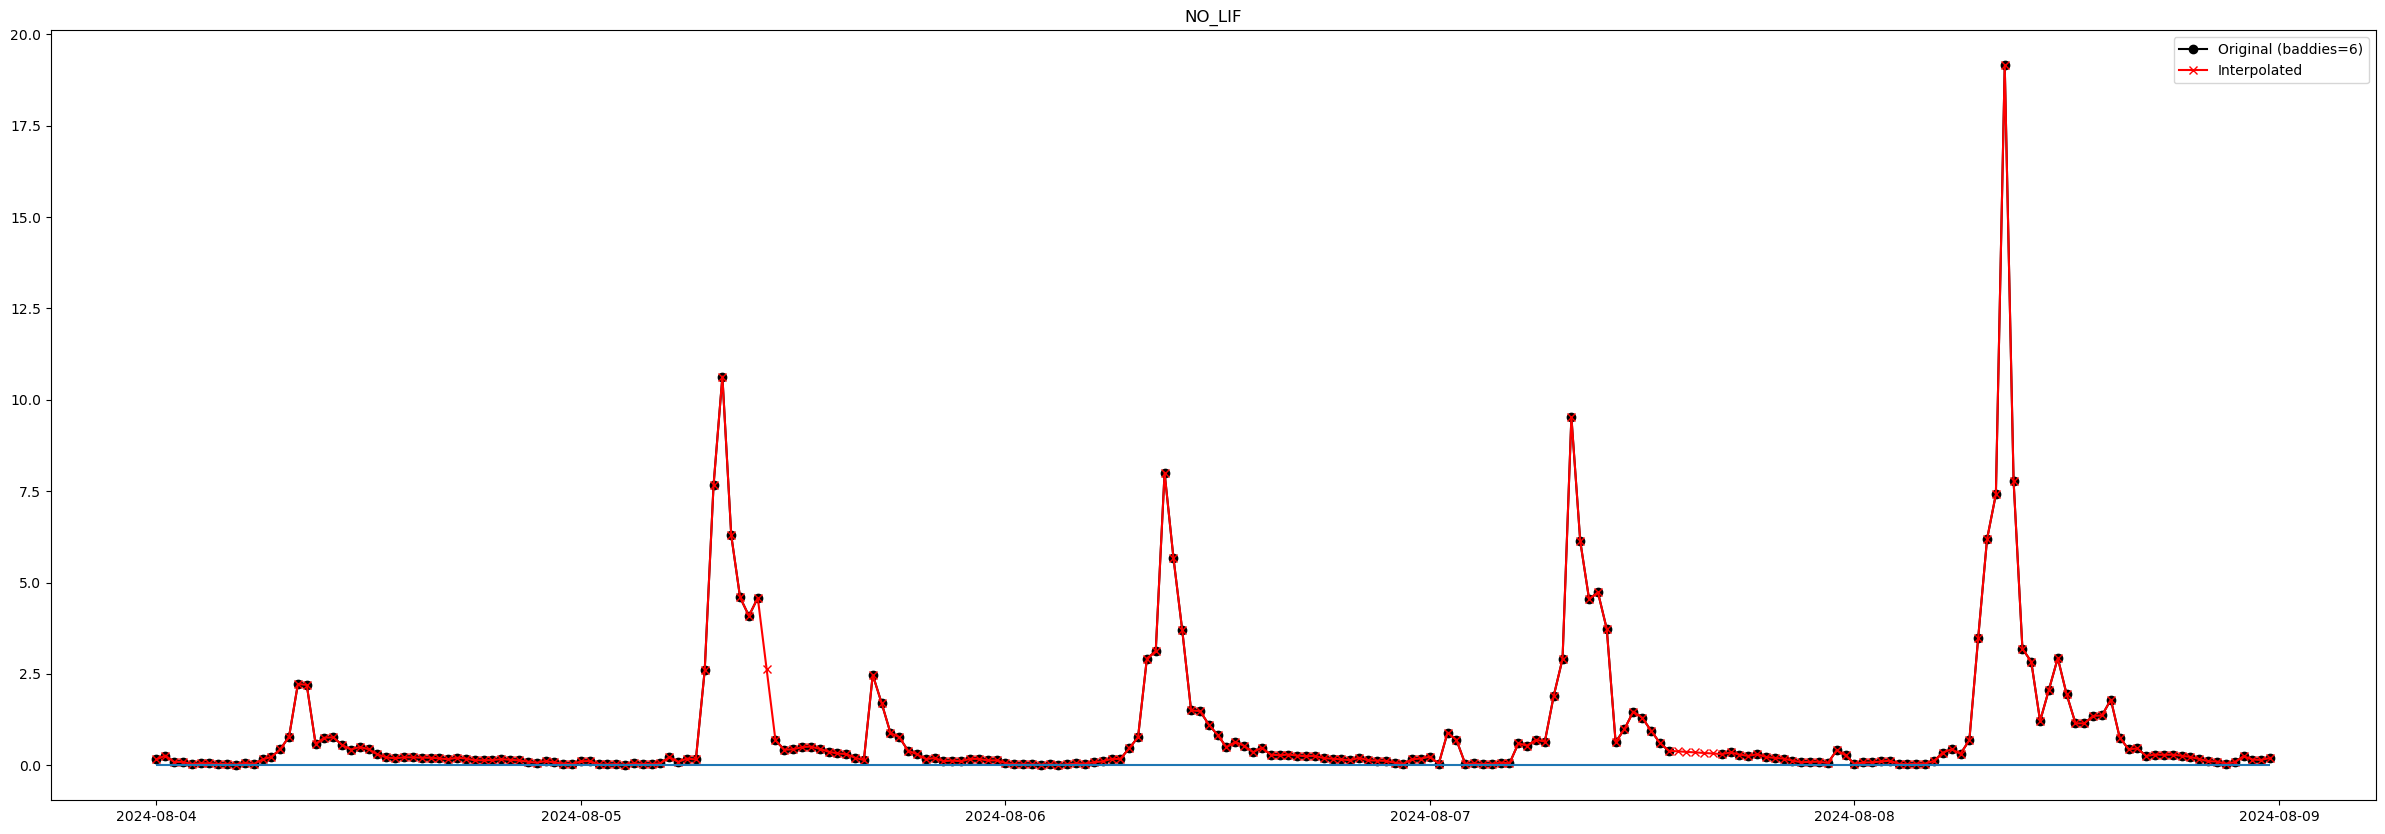

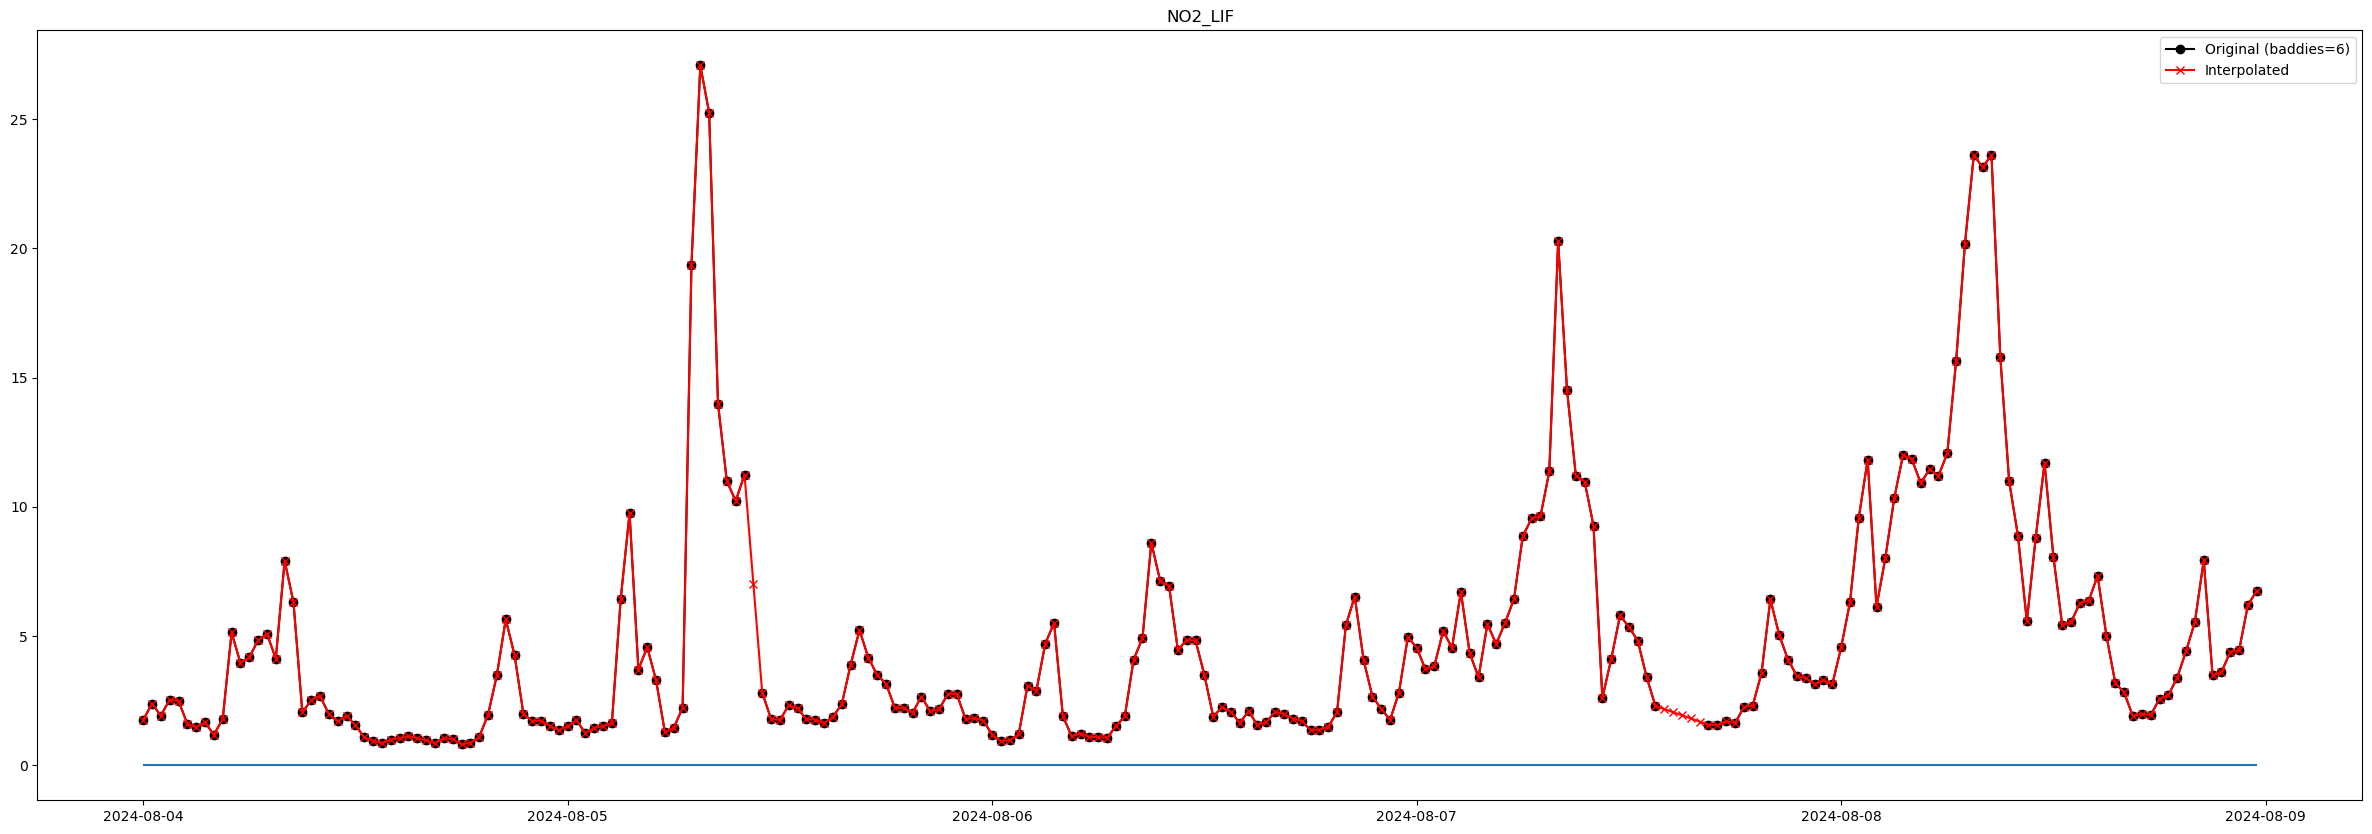

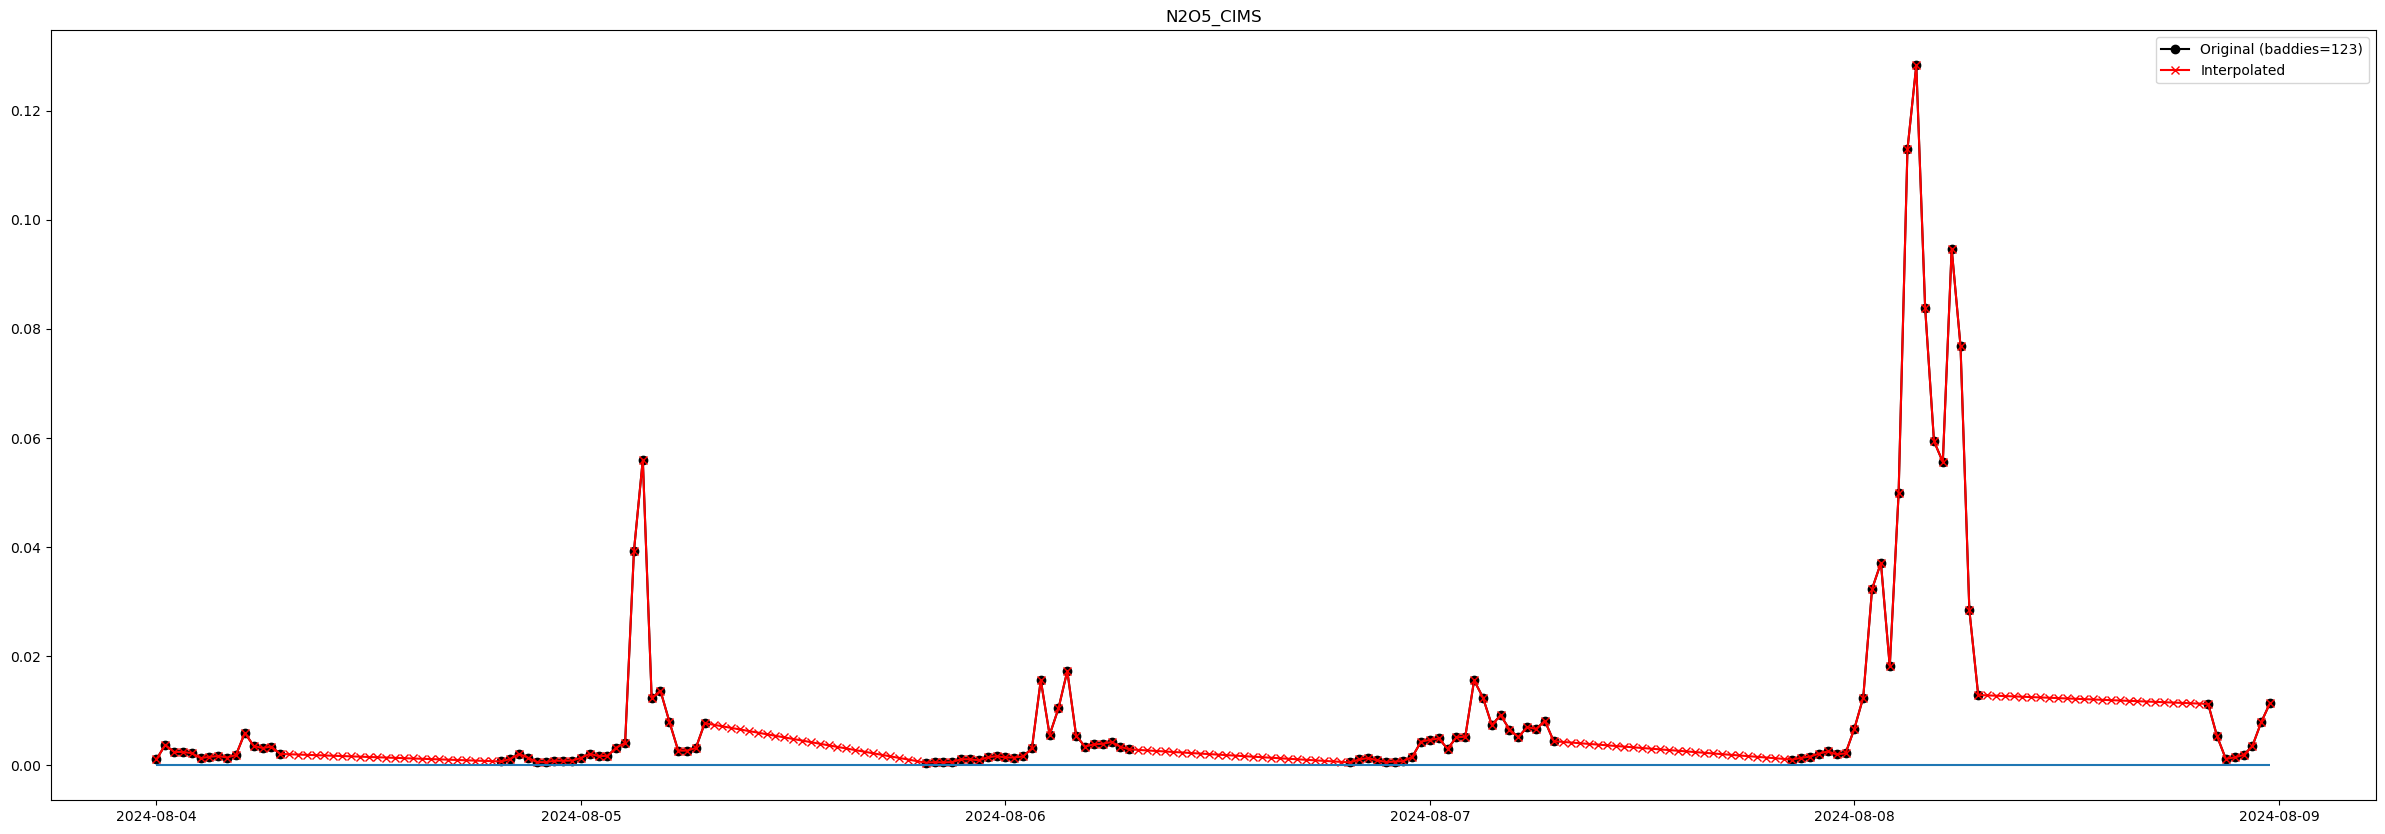

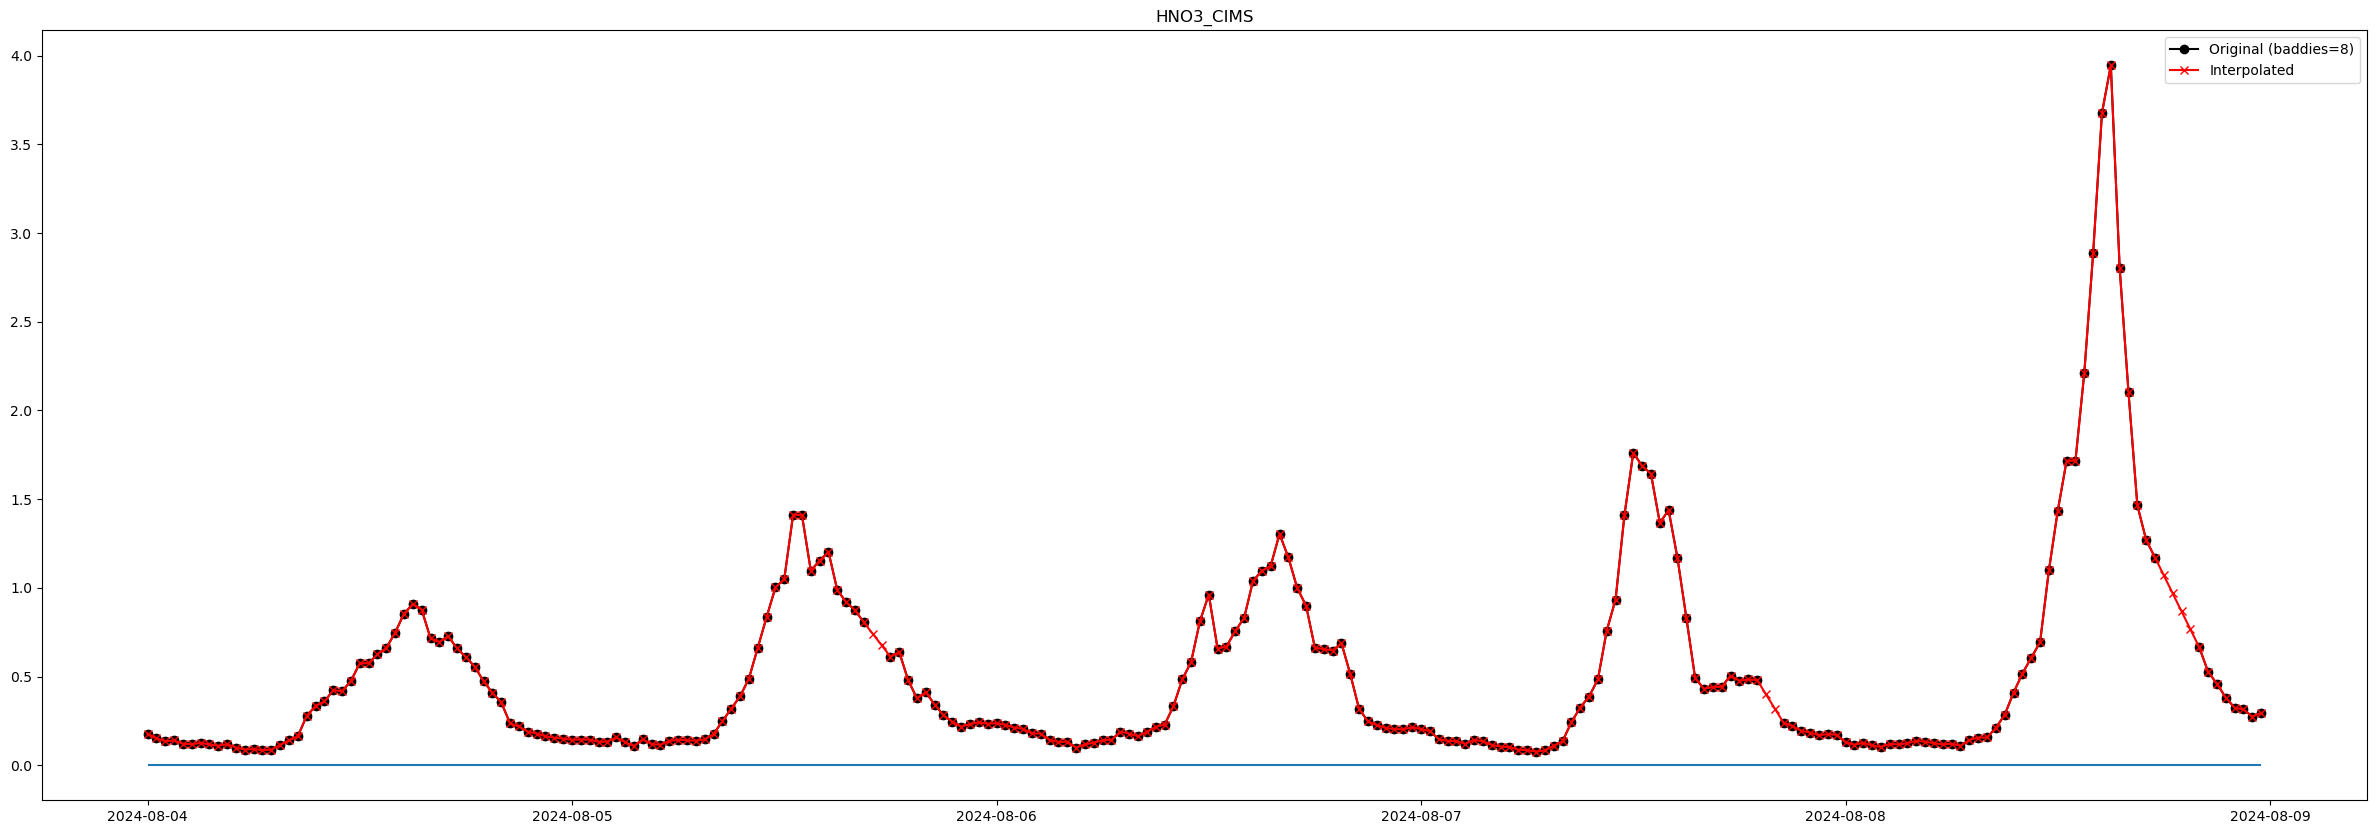

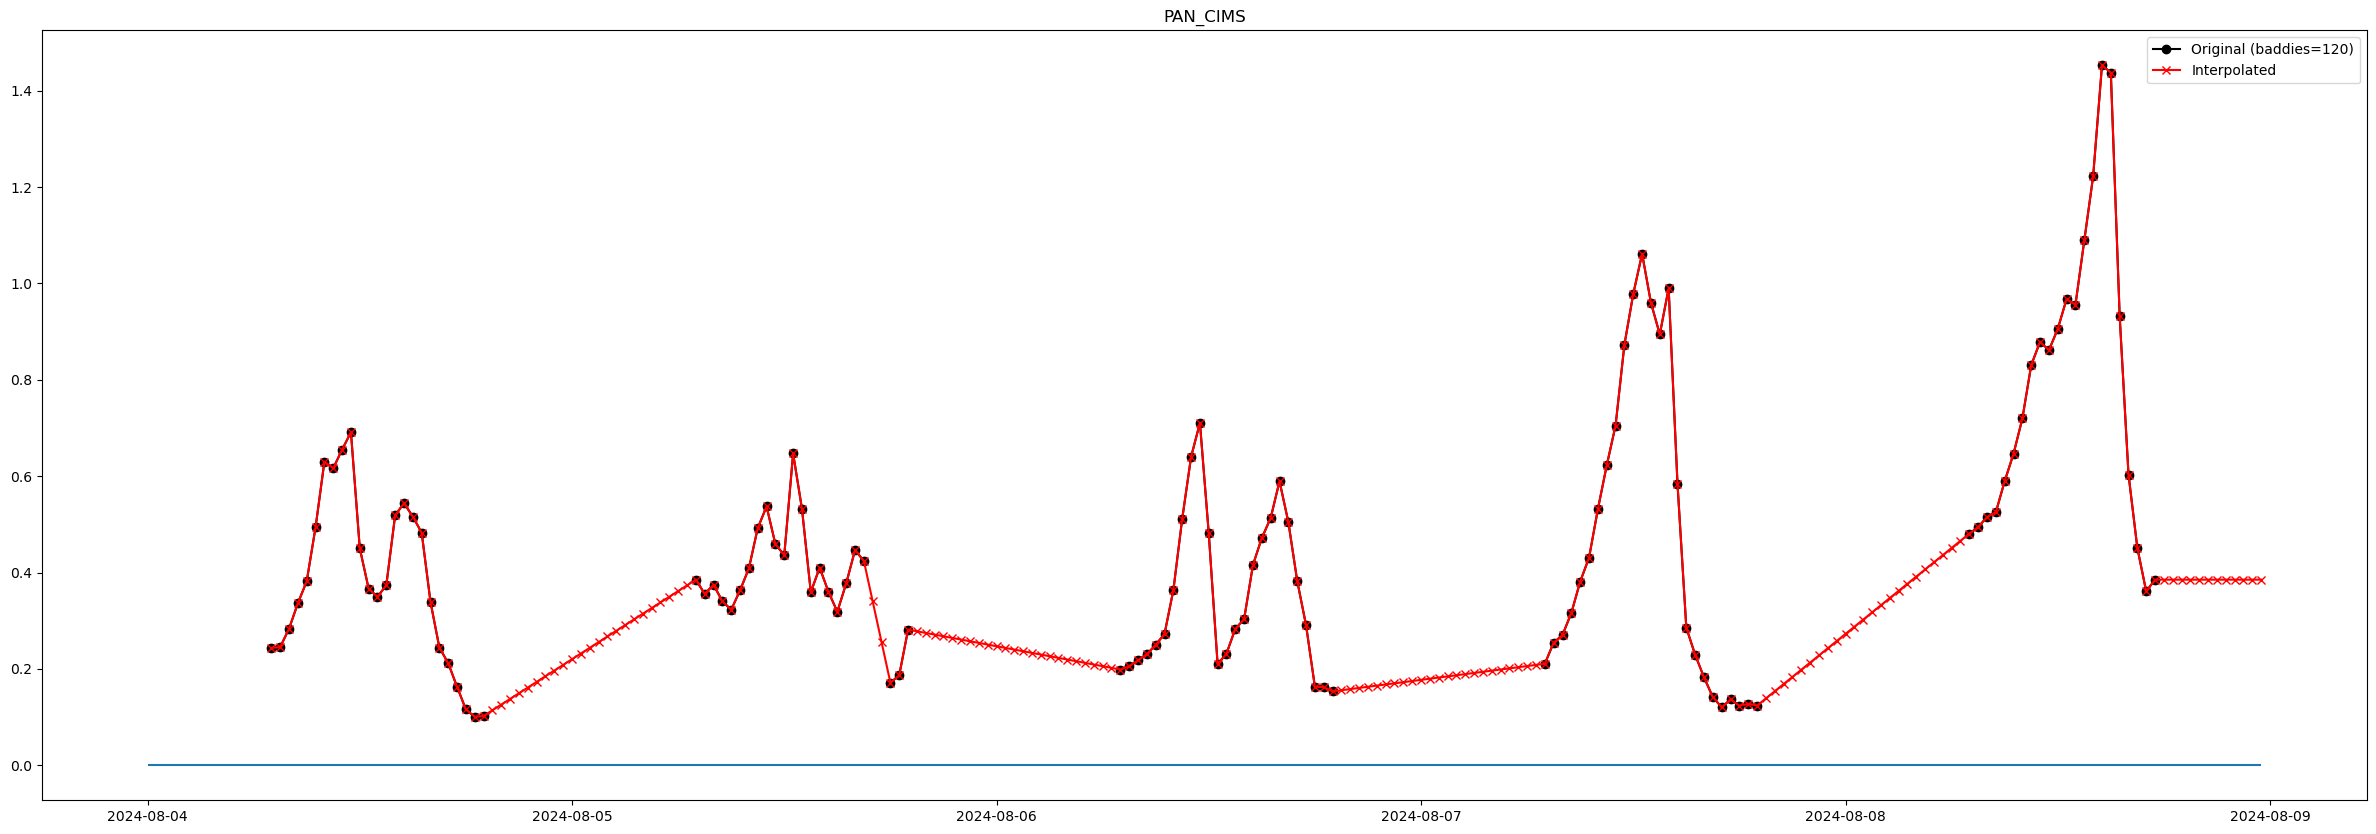

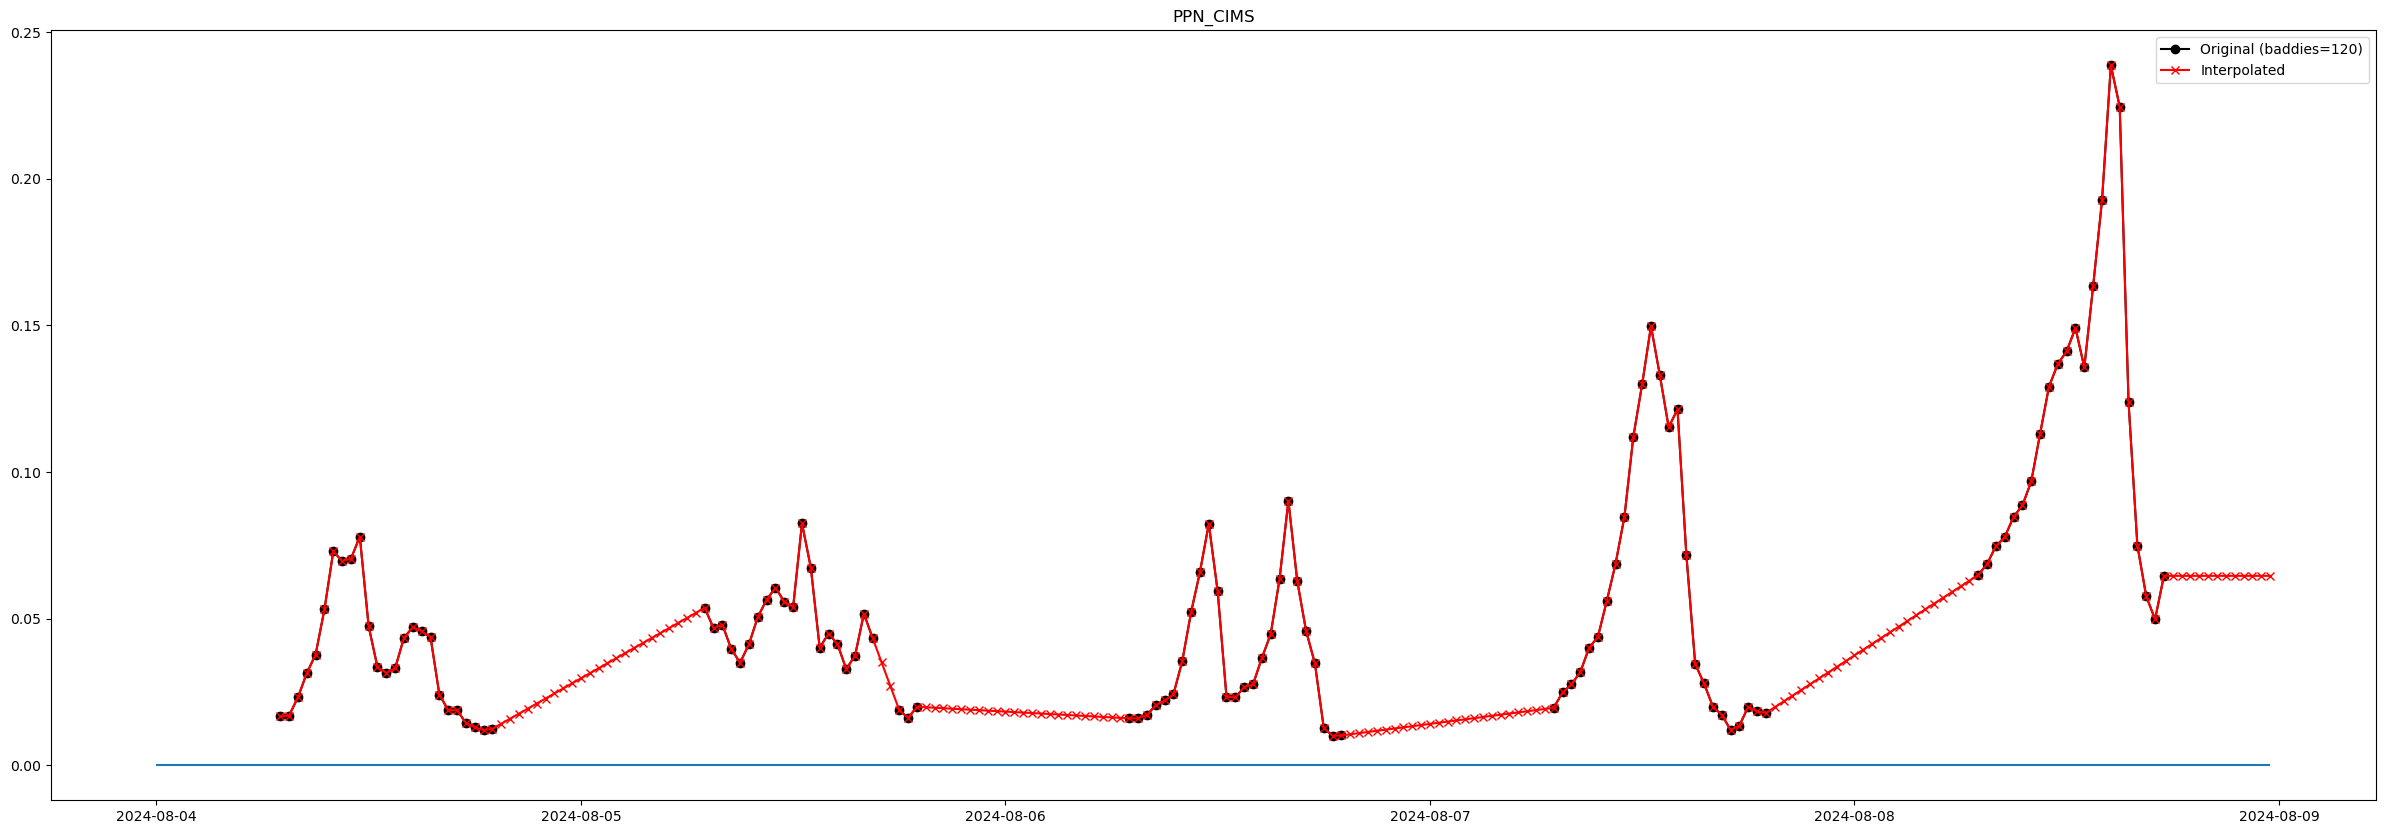

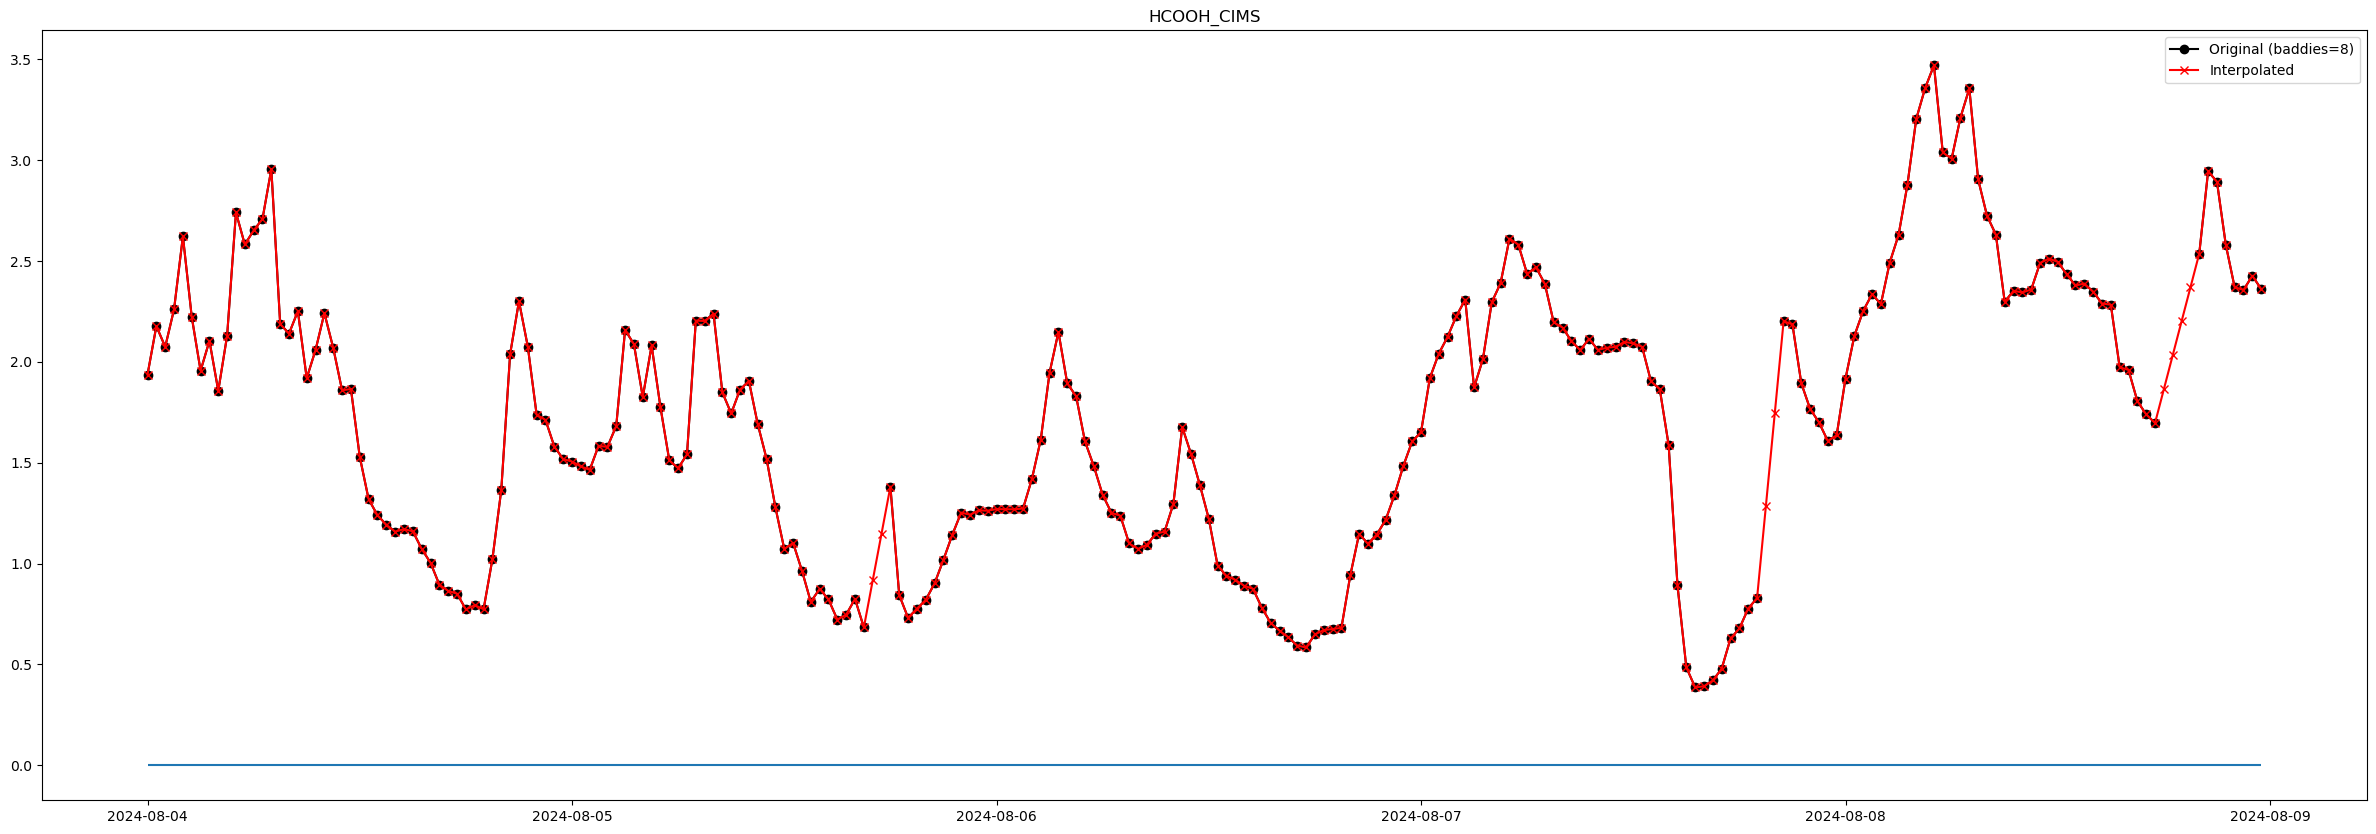

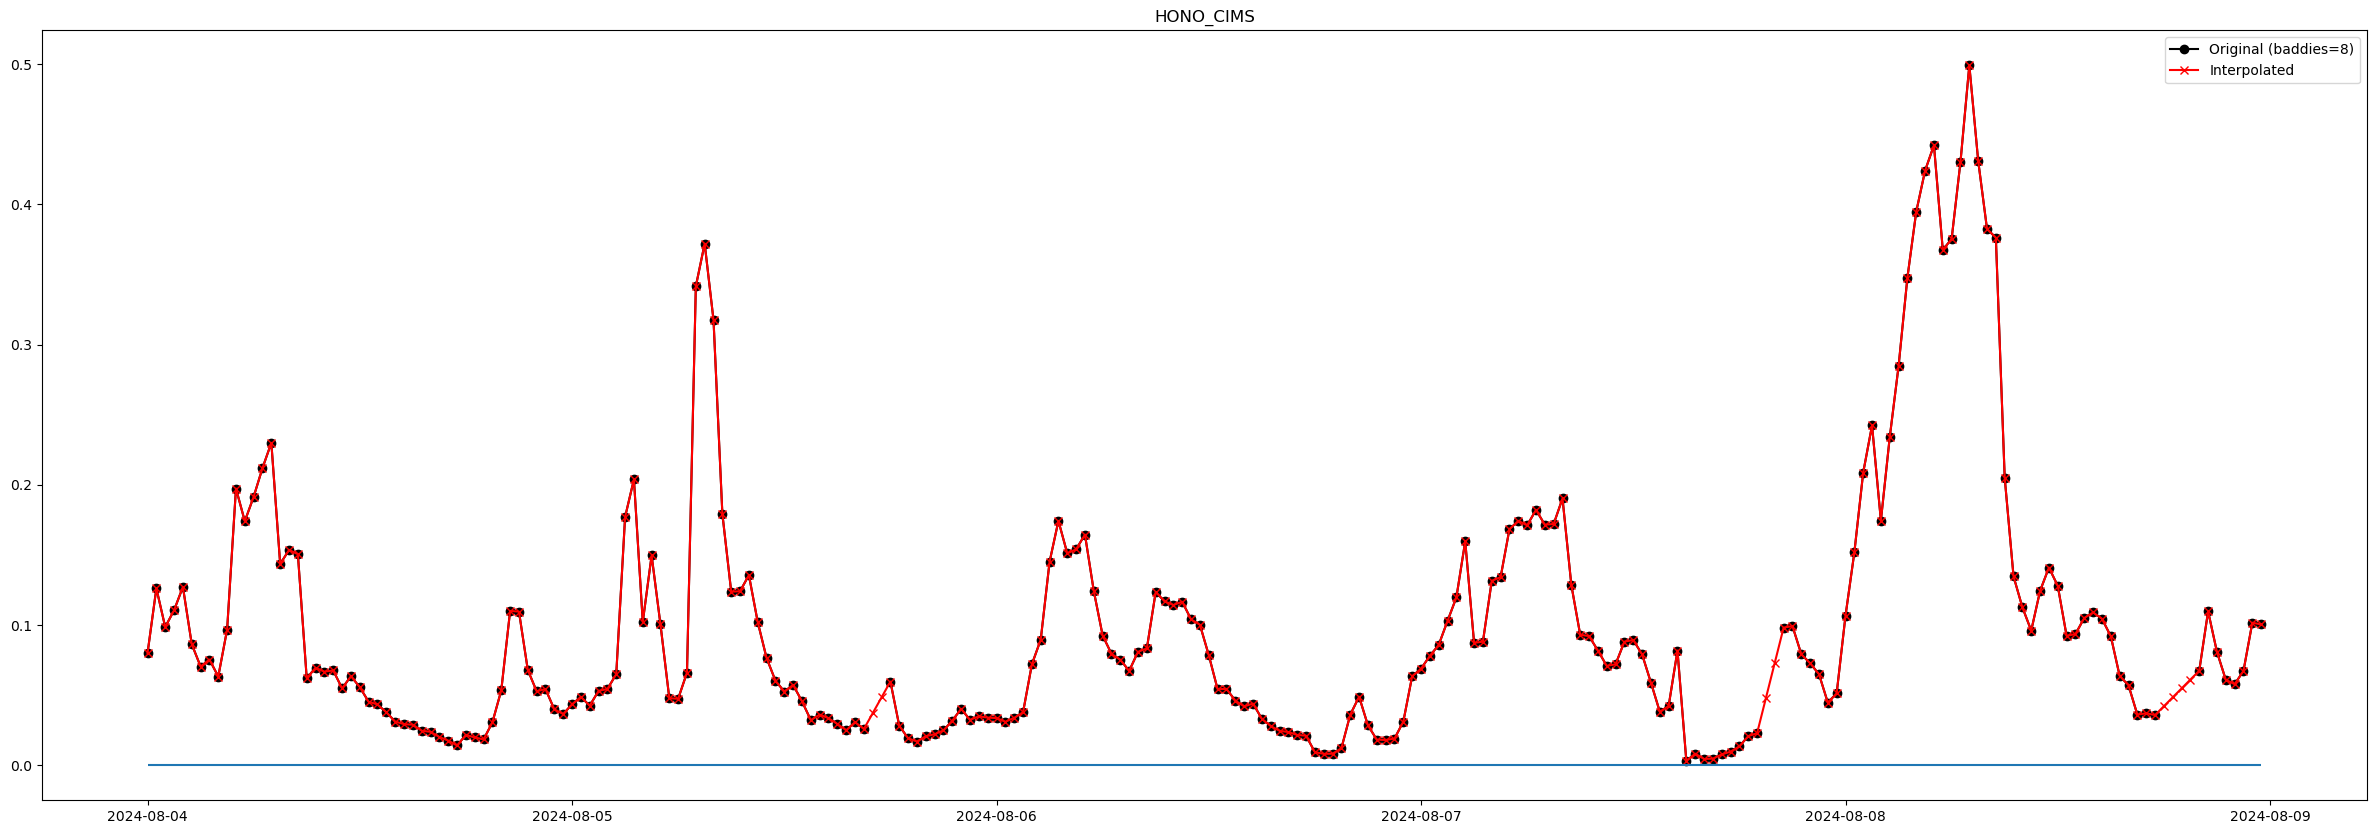

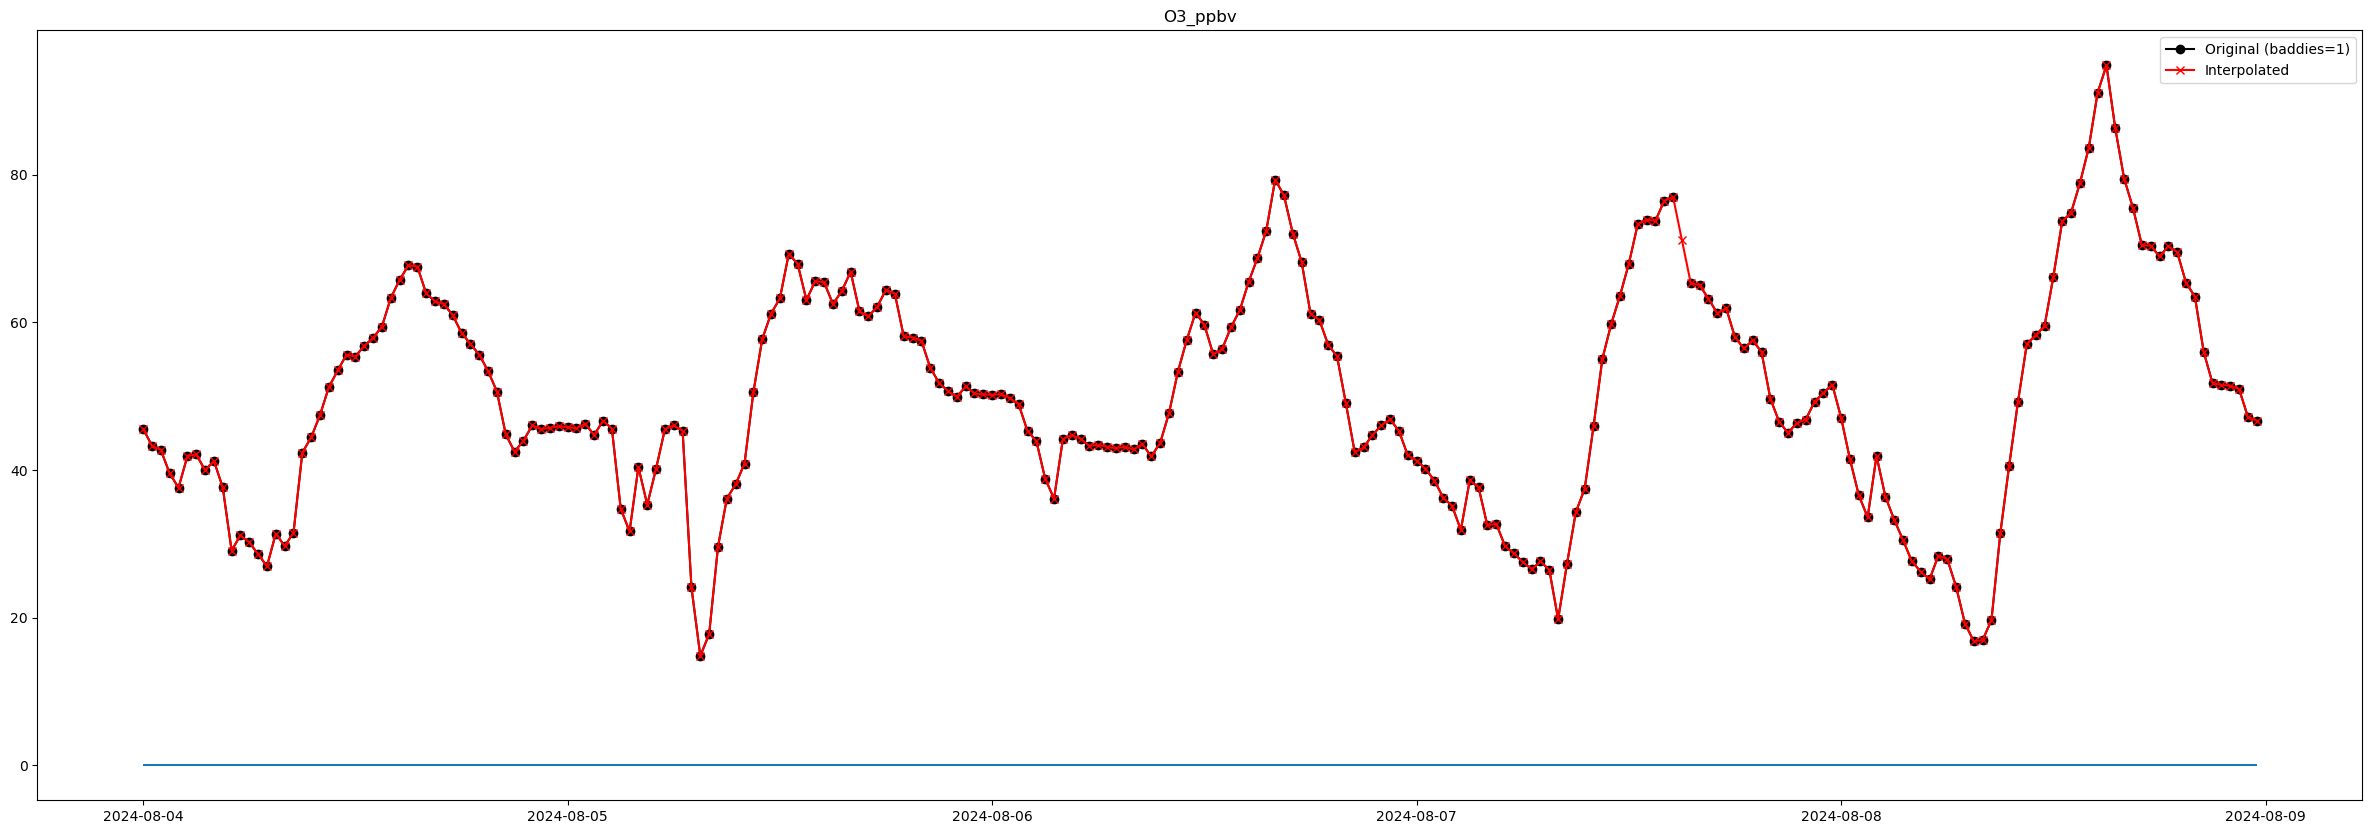

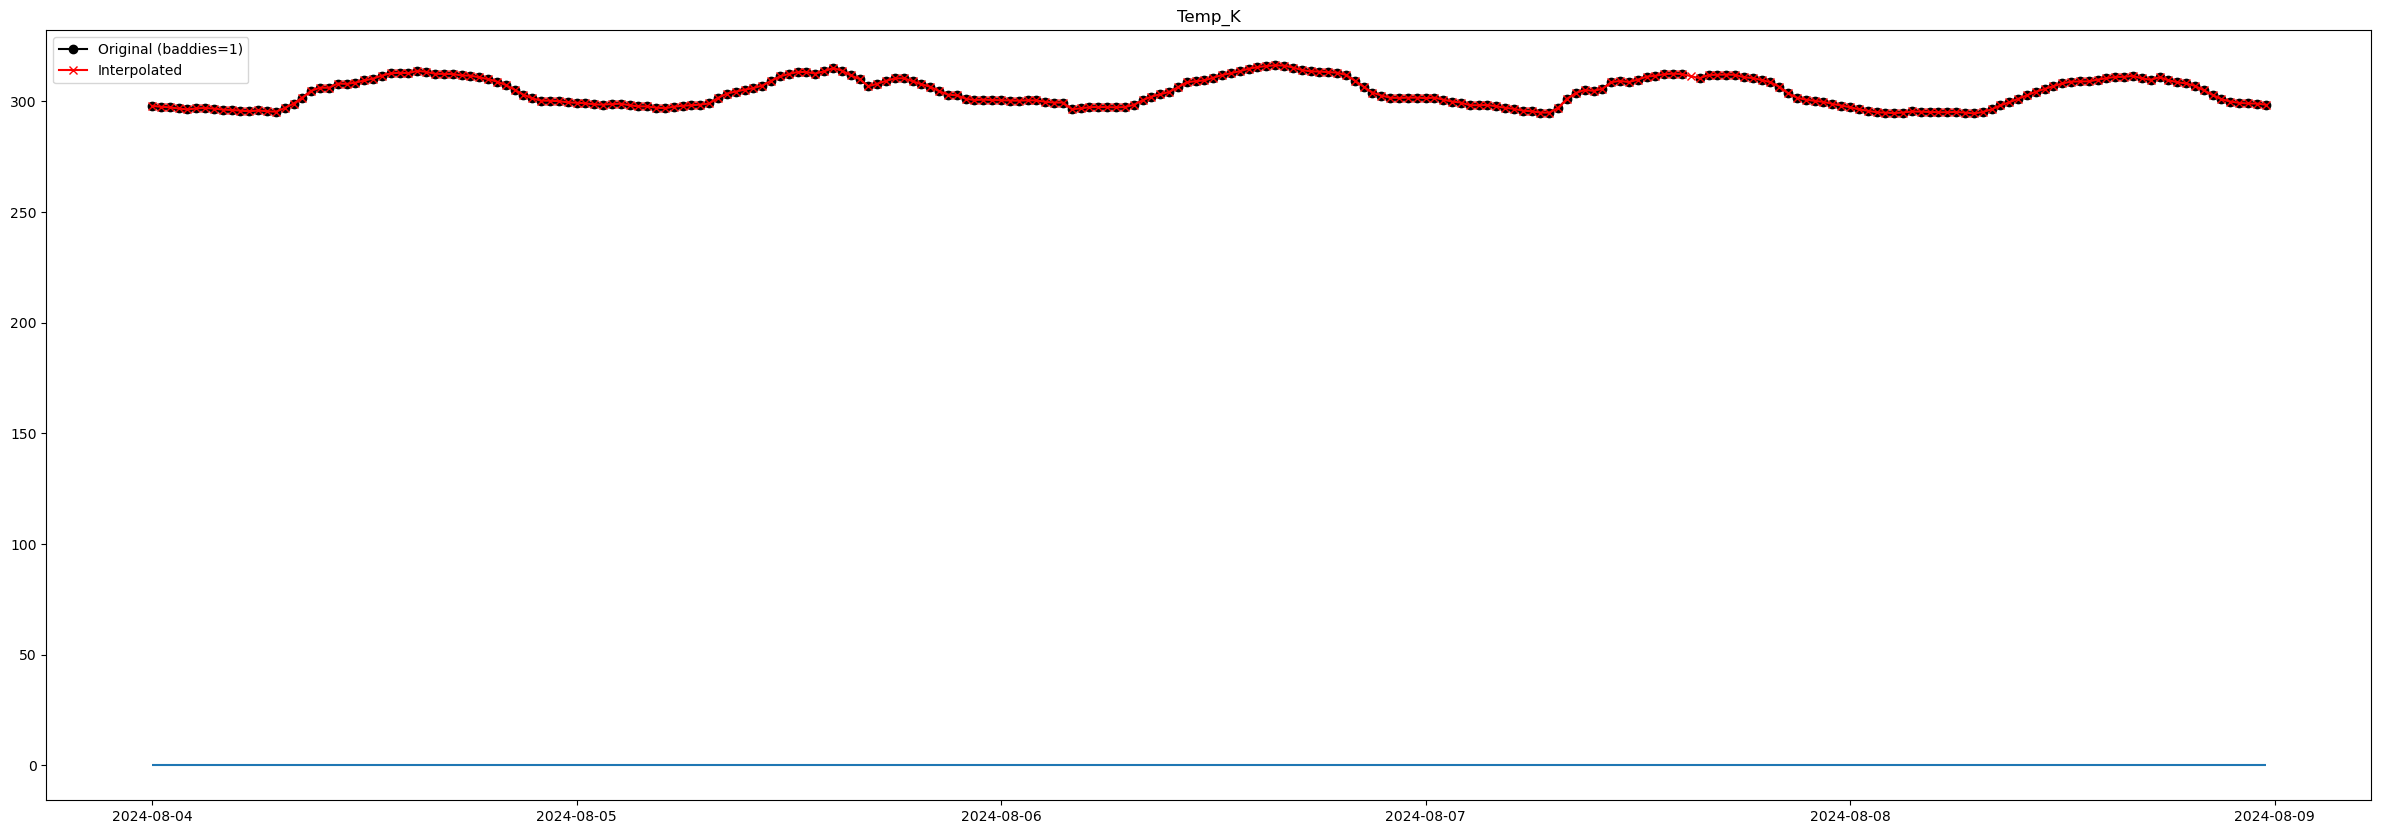

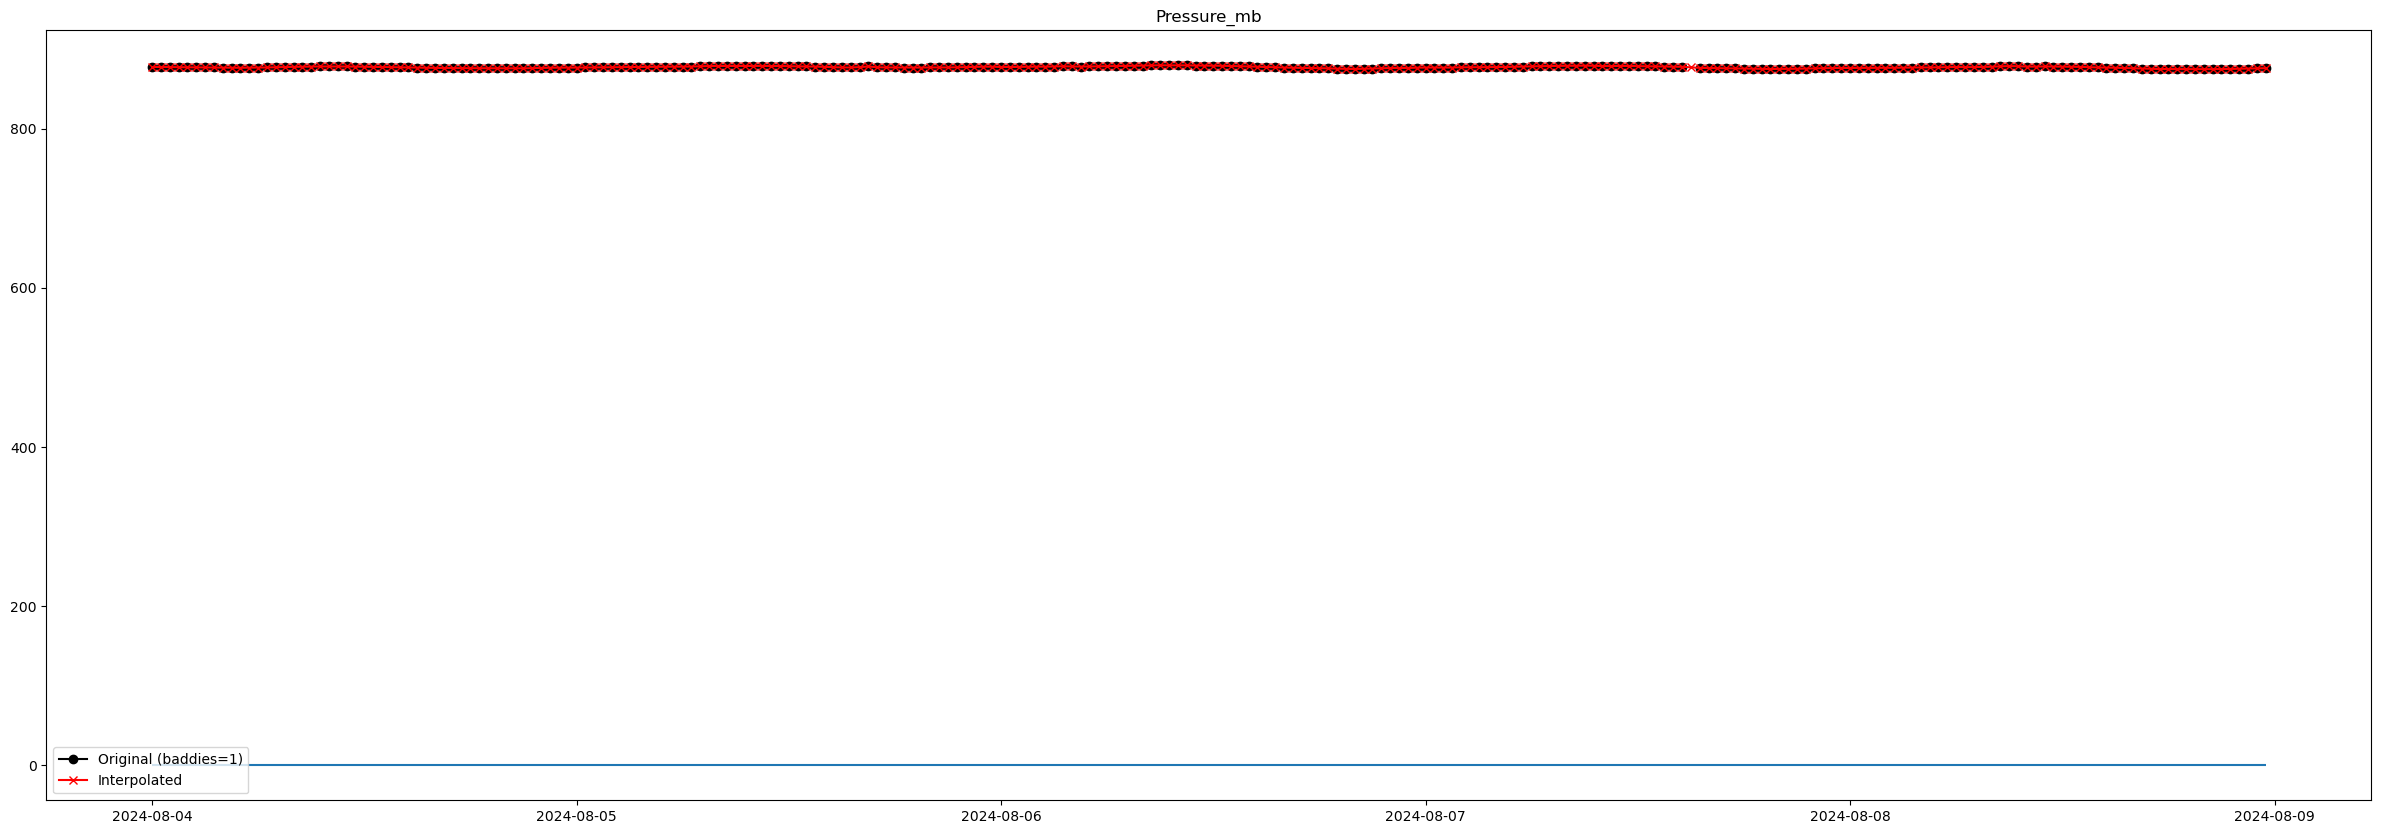

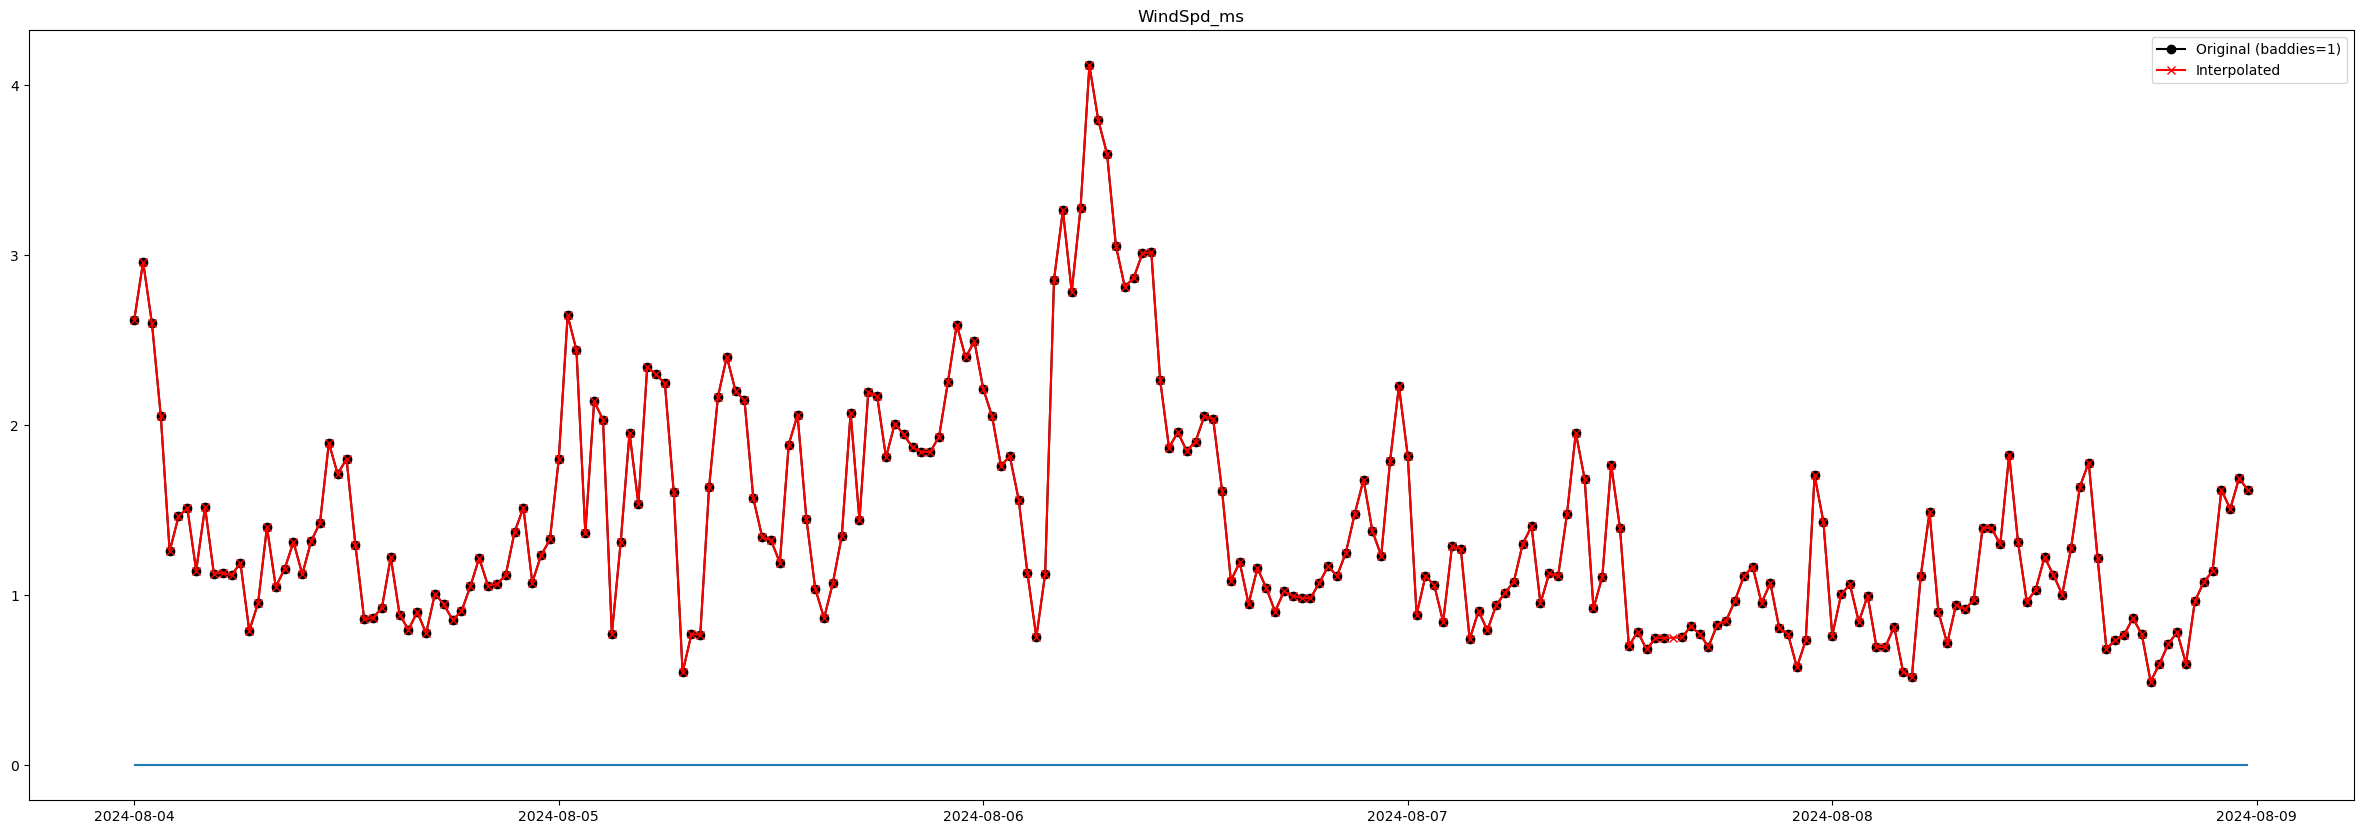

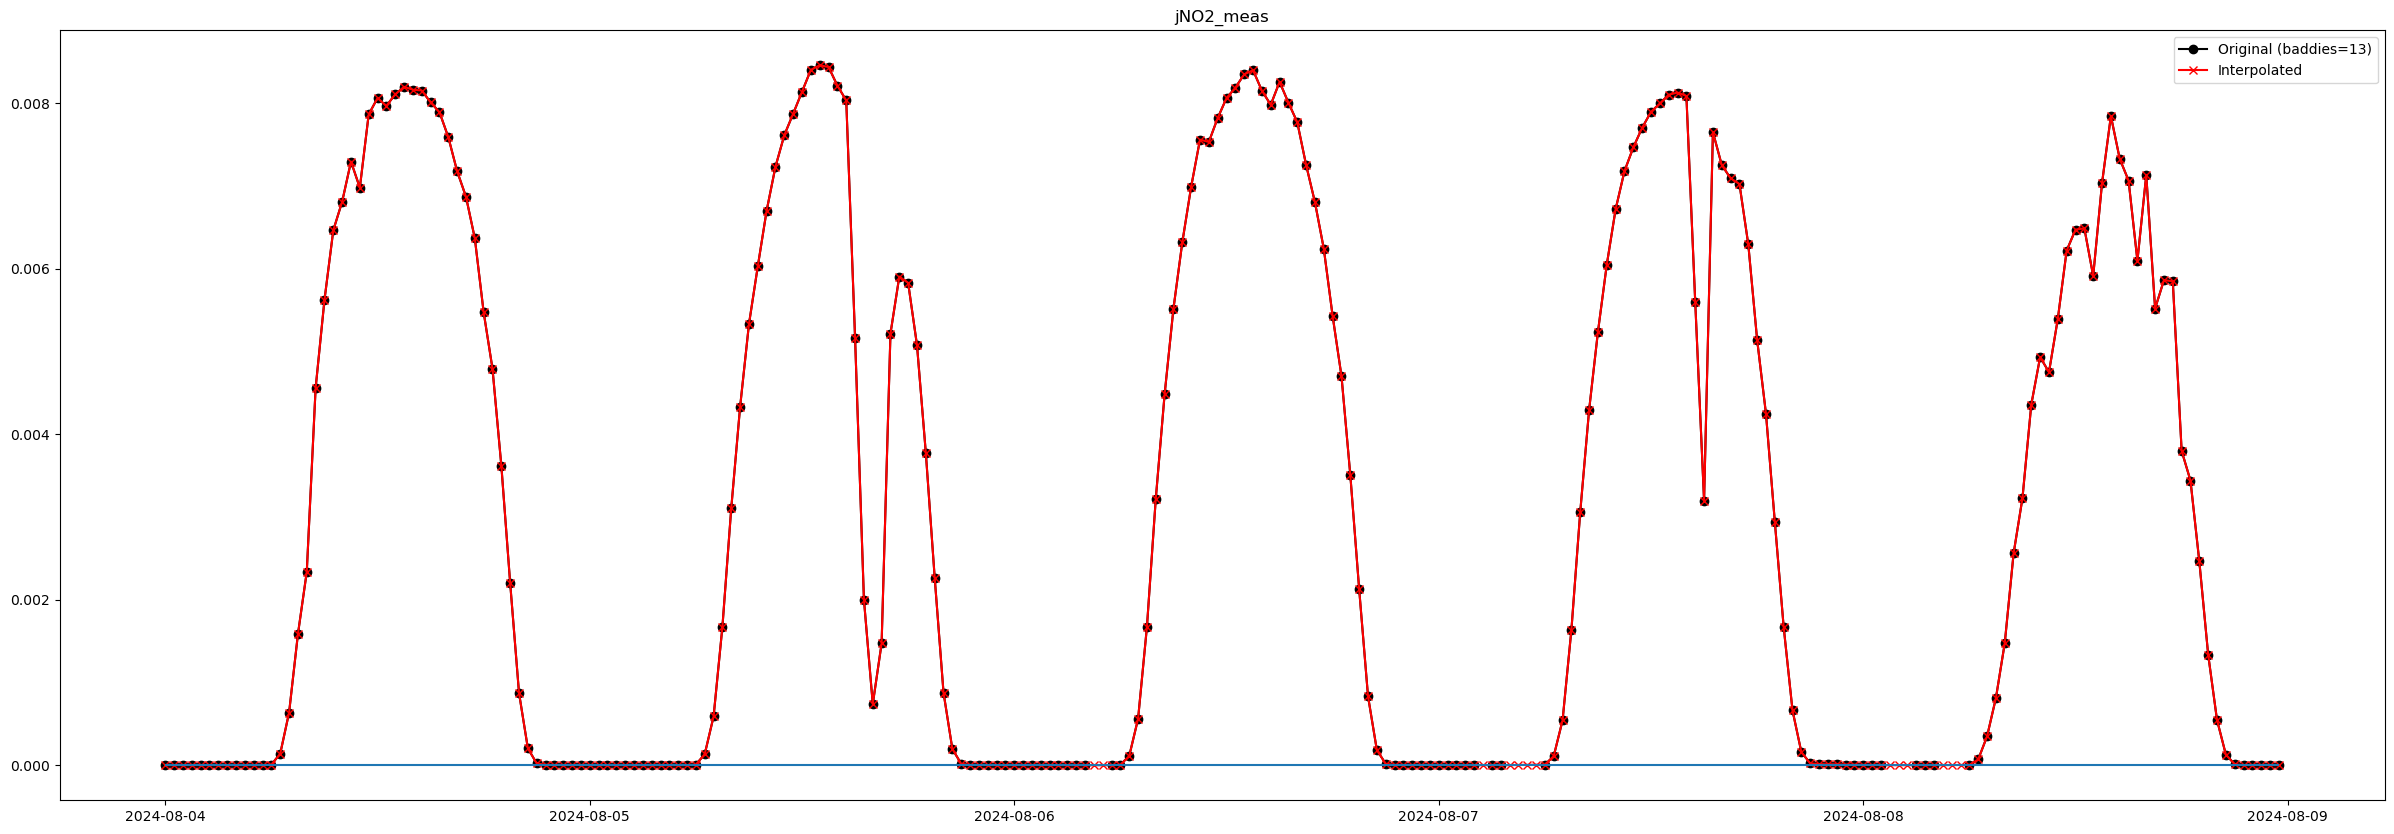

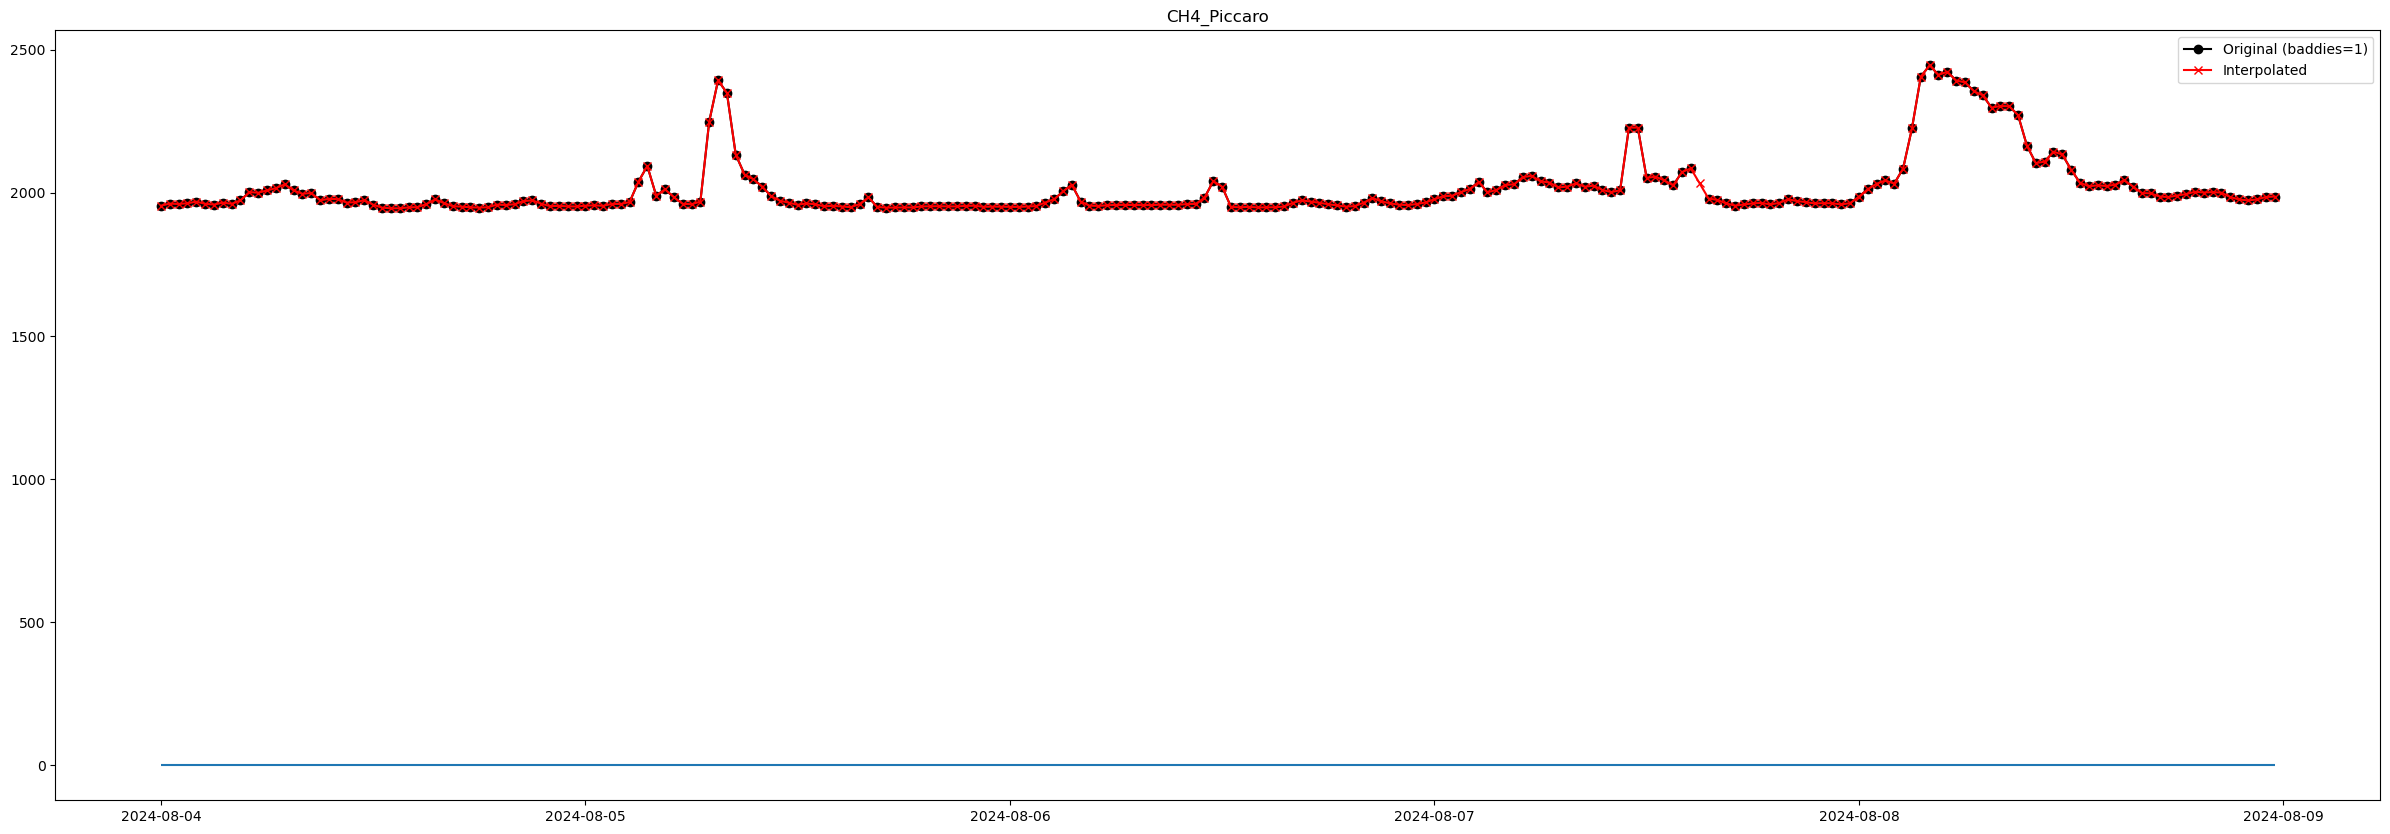

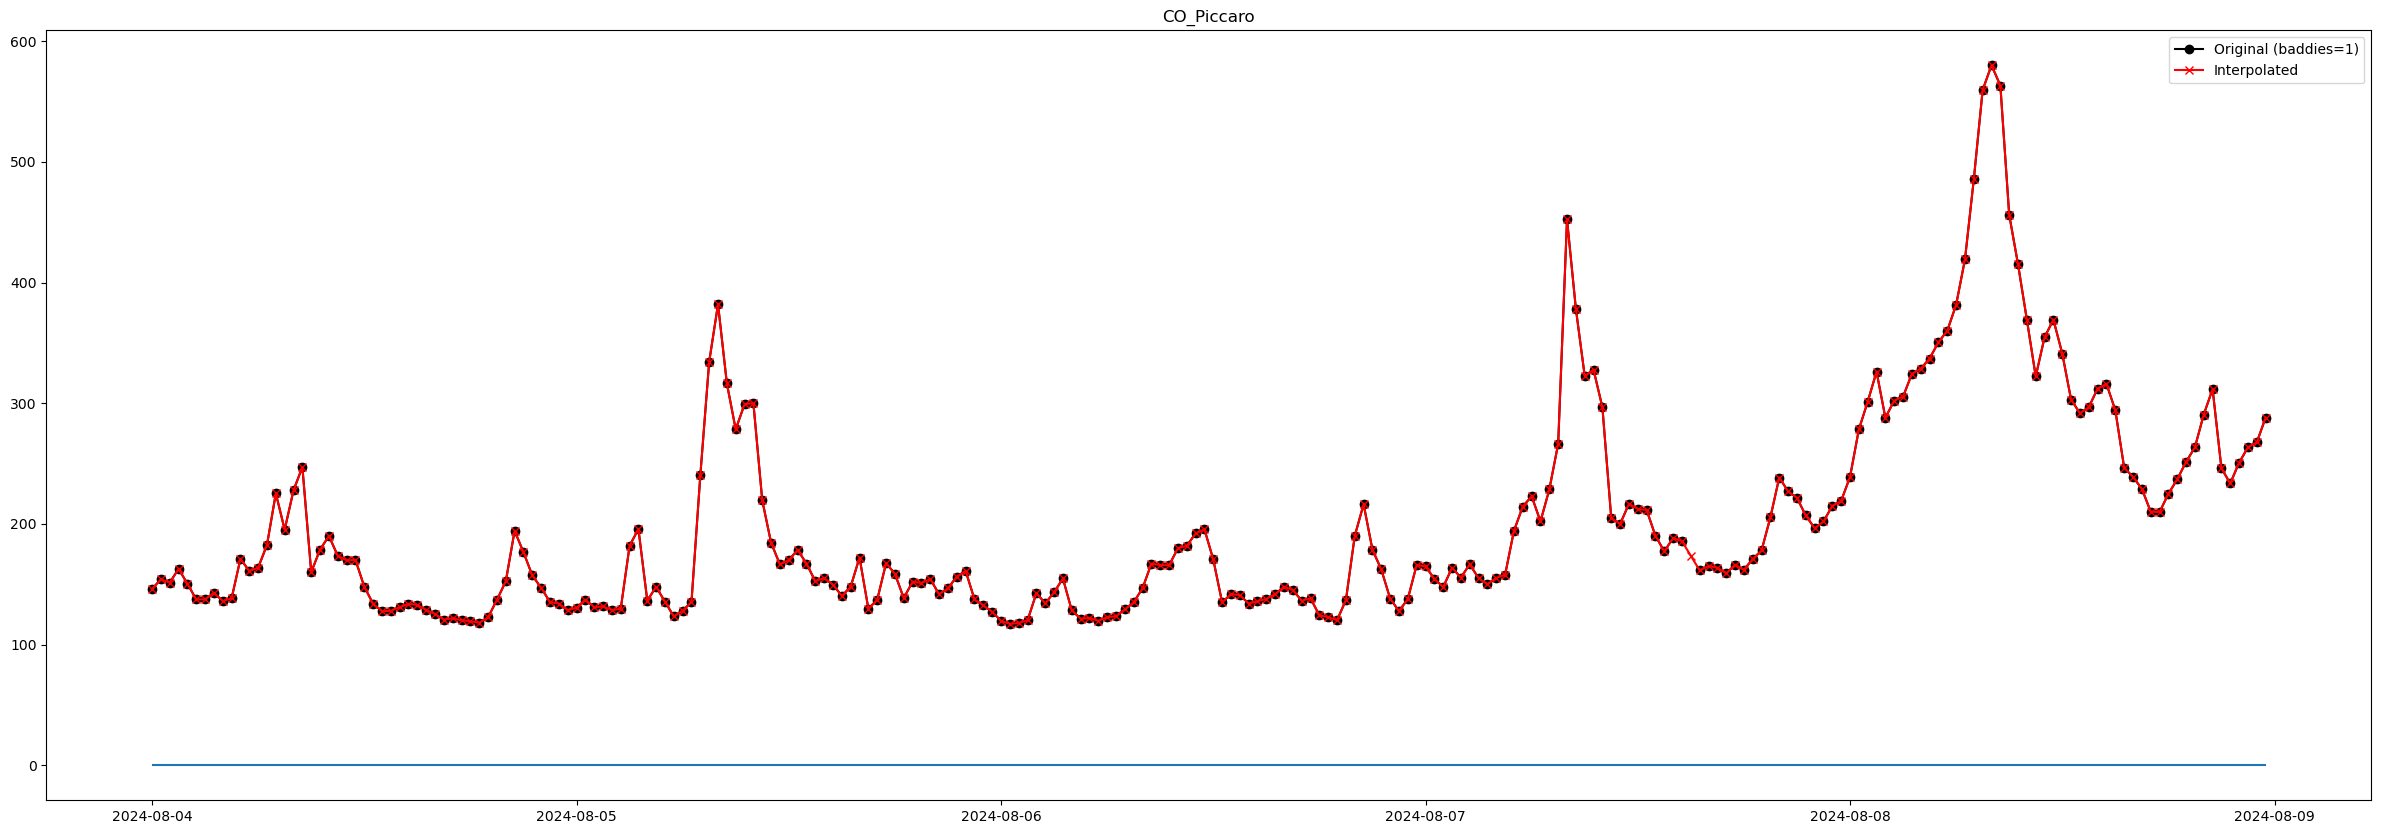

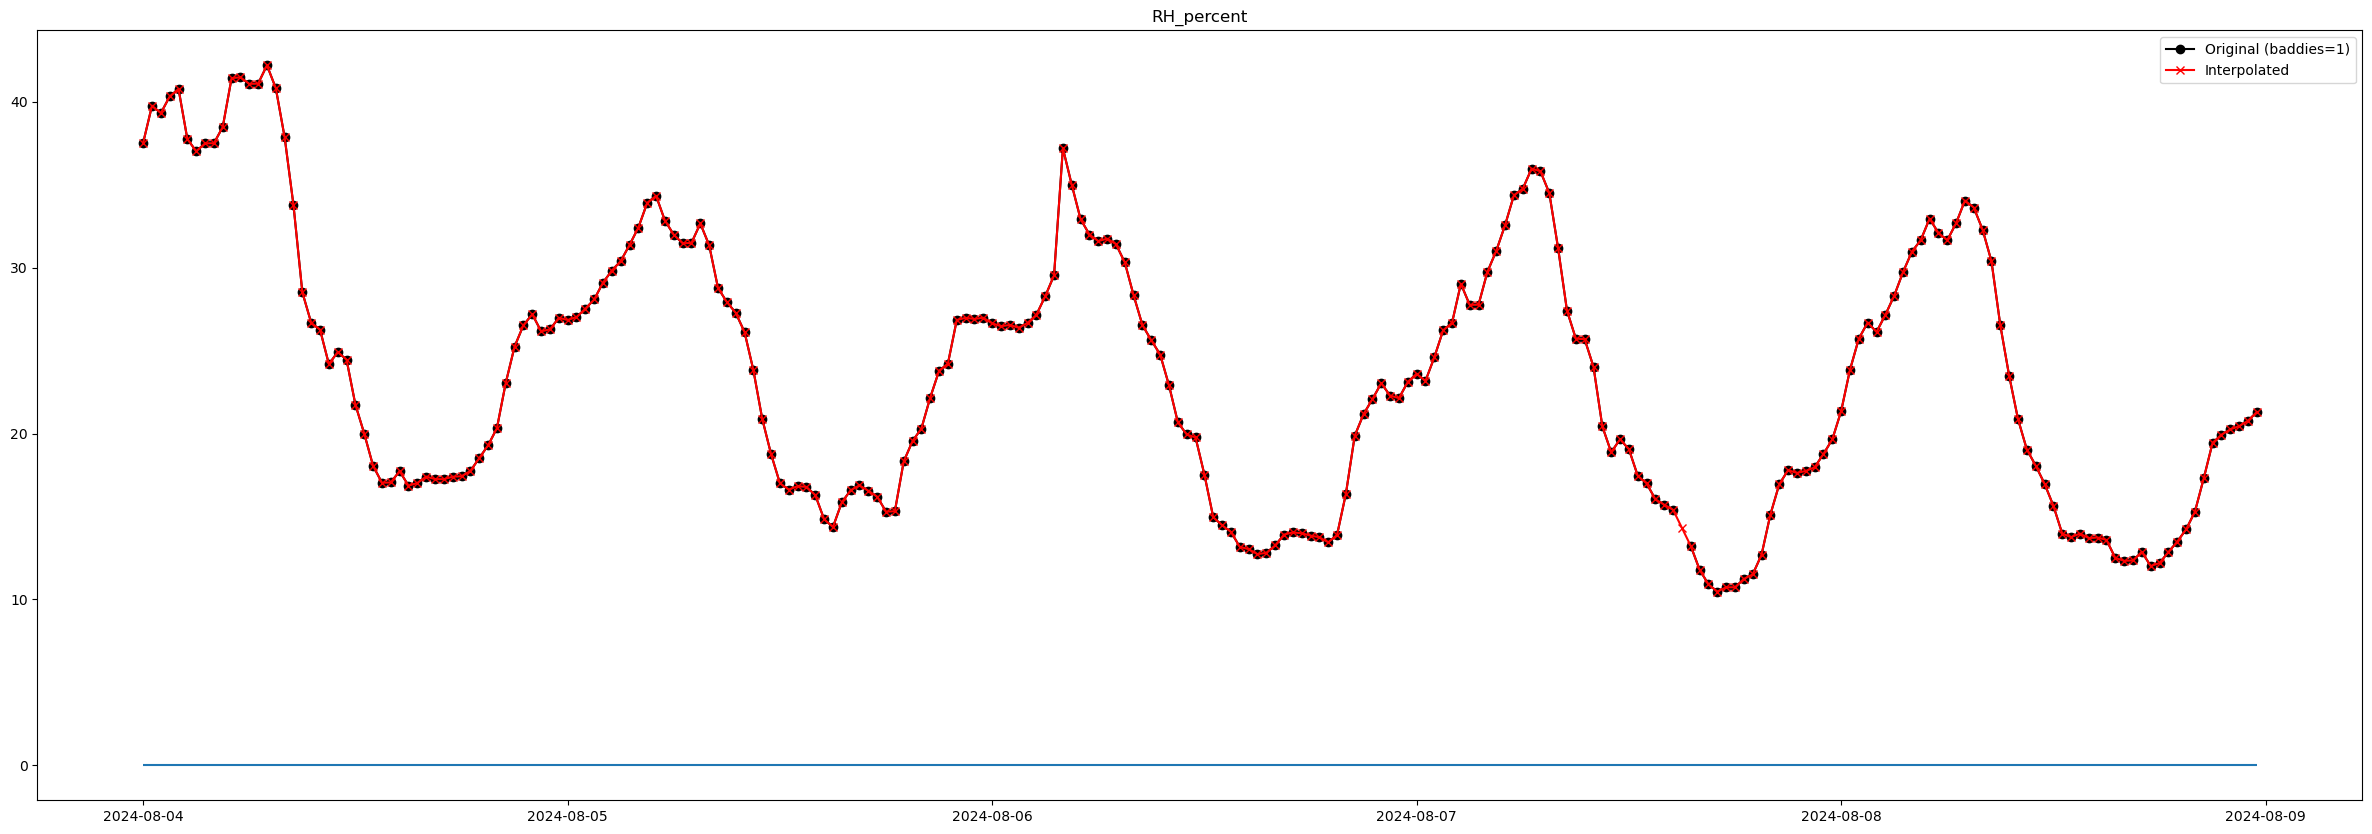

In [55]:
df_interp=df_smokefree.copy()

for i,col in enumerate(vars2fill):
    # Set any negative values to NaN so we can iterp them... 
    df_interp[col] = df_interp[col].mask(df_interp[col] < 0, np.nan)
                               
    # Calc number of points that are negative or Nans: 
    n_baddies= len([item for item in df_smokefree[col] if item <0 or np.isnan(item)])                    
    if n_baddies > 0: 
        #apply the linear interpolation
        df_interp[col] = df_interp[col].interpolate(method='linear')
        #Plot it so we can take a look at it... 
        fig, ax = plt.subplots(figsize = (30,10))
        plt.plot(df_smokefree.index, df_smokefree[col], color='k', marker='o',label=f'Original (baddies={n_baddies})')
        plt.plot(df_interp.index, df_interp[col], color='r', marker='x', label='Interpolated')
        plt.legend()
        plt.title(col)
        
        plt.hlines(y=0, xmin = df_interp.index[0], xmax = df_interp.index[239])
        # ax.set_xticks(range(0,len(df_smokefree.index),2))
        # labels=df_smokefree.index.strftime('%H')[0::2])
        # plt.yticks(ticks=np.arange(len(df_transposed_smokefree.index)), labels=df_transposed_smokefree.index)
        # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))
        # ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
        # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        # ax.set_title(col)
        
        # Define start and end times for the plot
        # start_time = df.index.min().replace(hour=0, minute=0, second=0, microsecond=0)
        # end_time = df.index.min().replace(hour=23, minute=30, second=0, microsecond=0)
        # start_time = 
        # end_time = 
        # #Set x-axis limits
        # ax.set_xlim(start_time, end_time)
        plt.show()

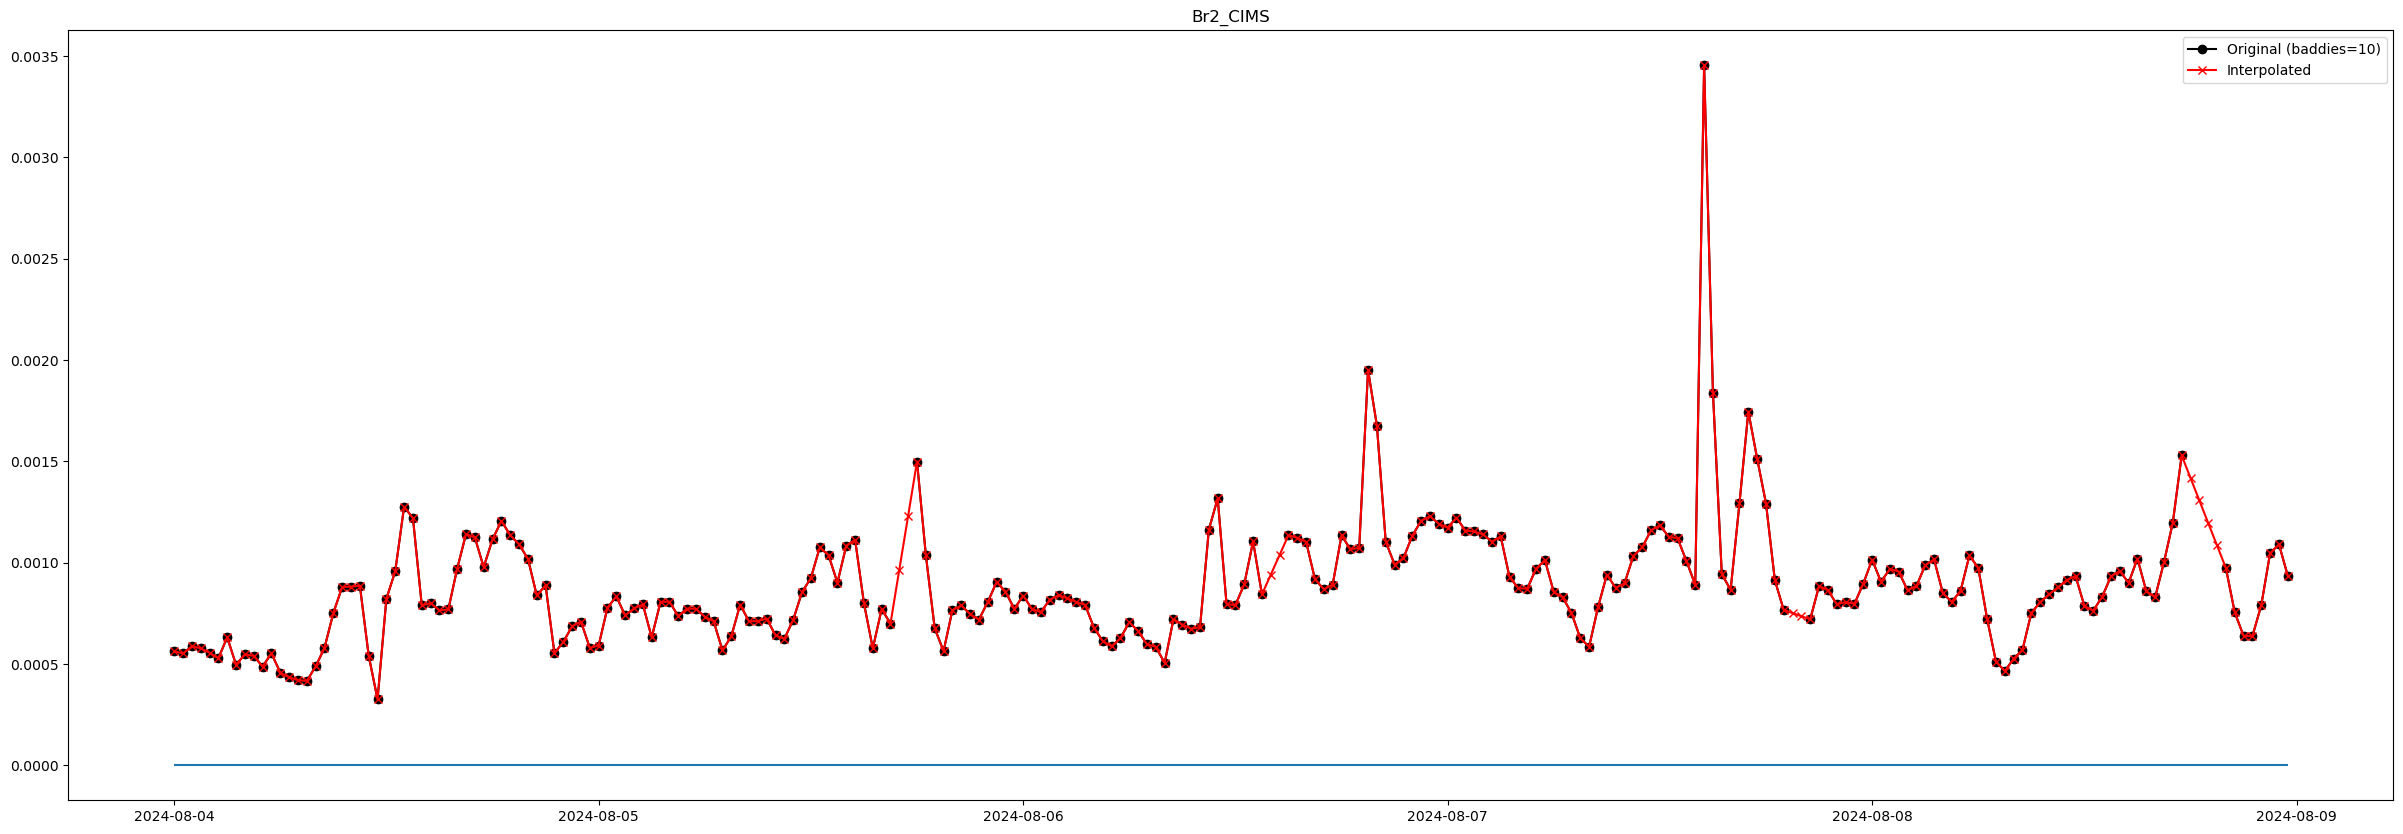

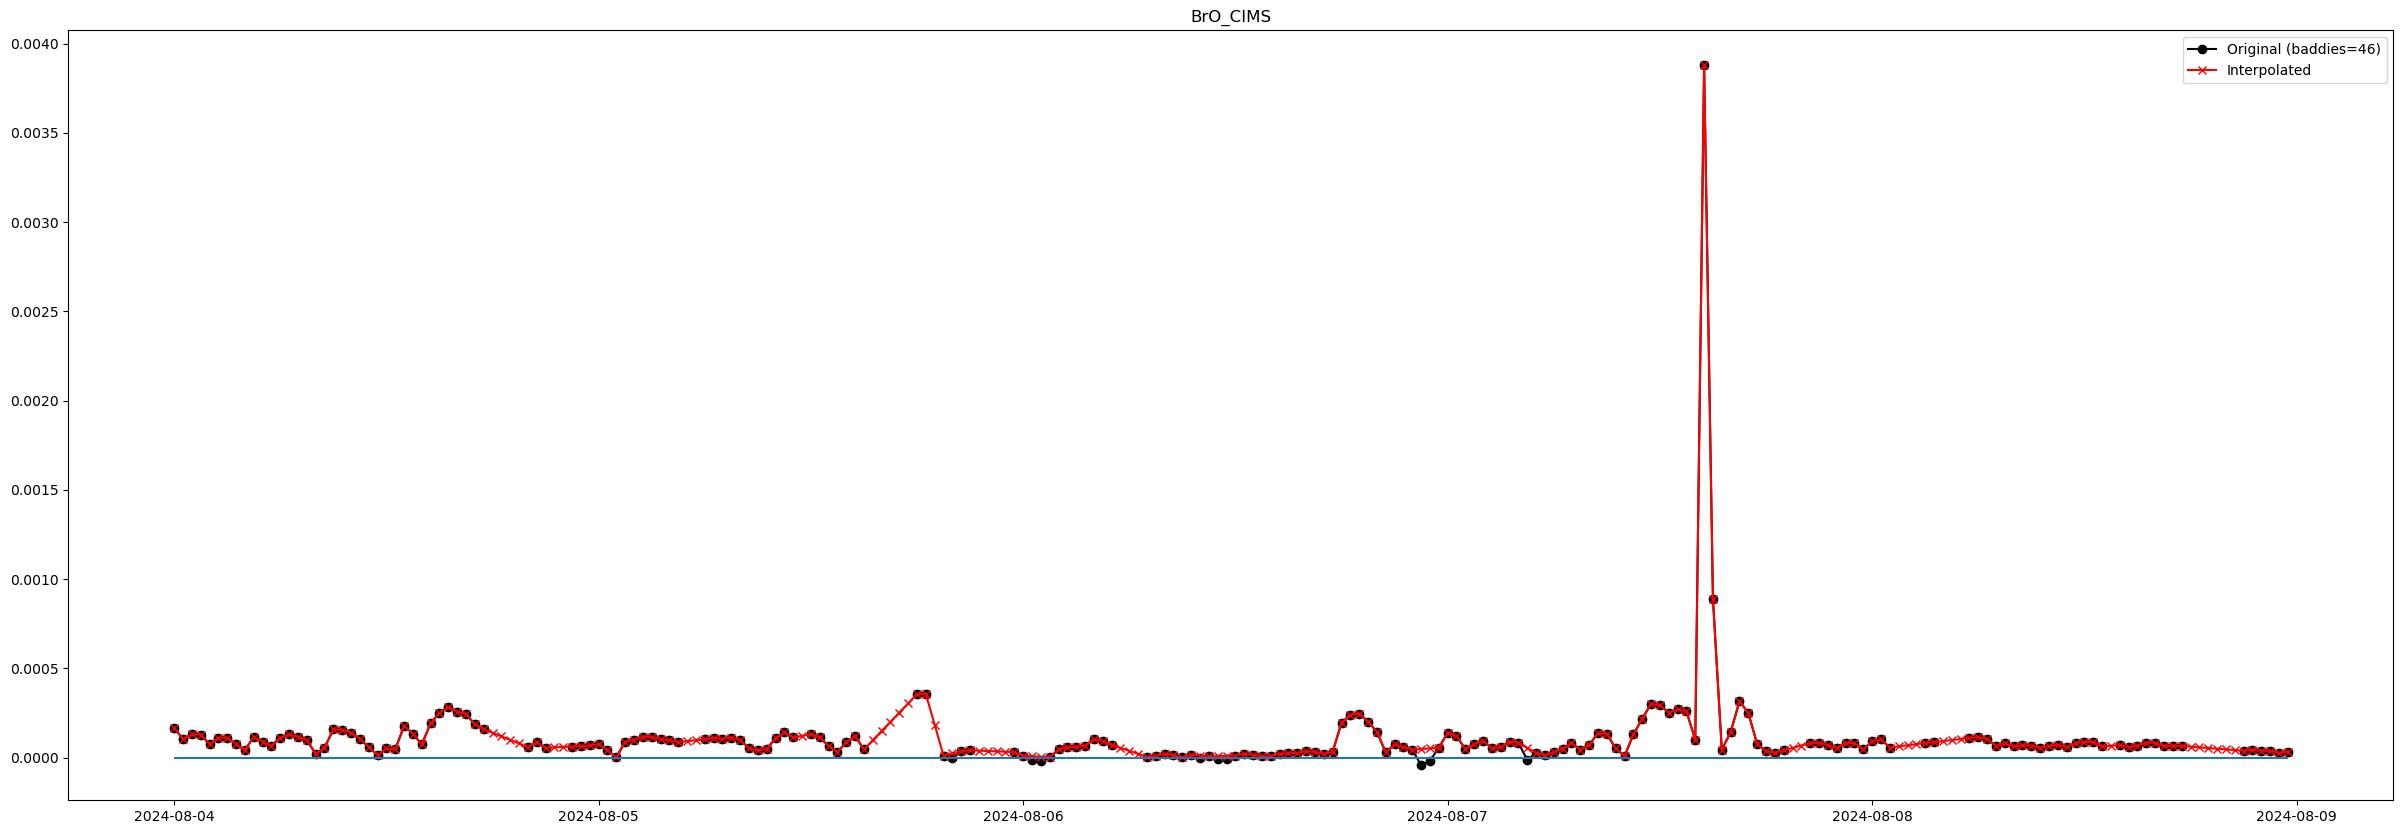

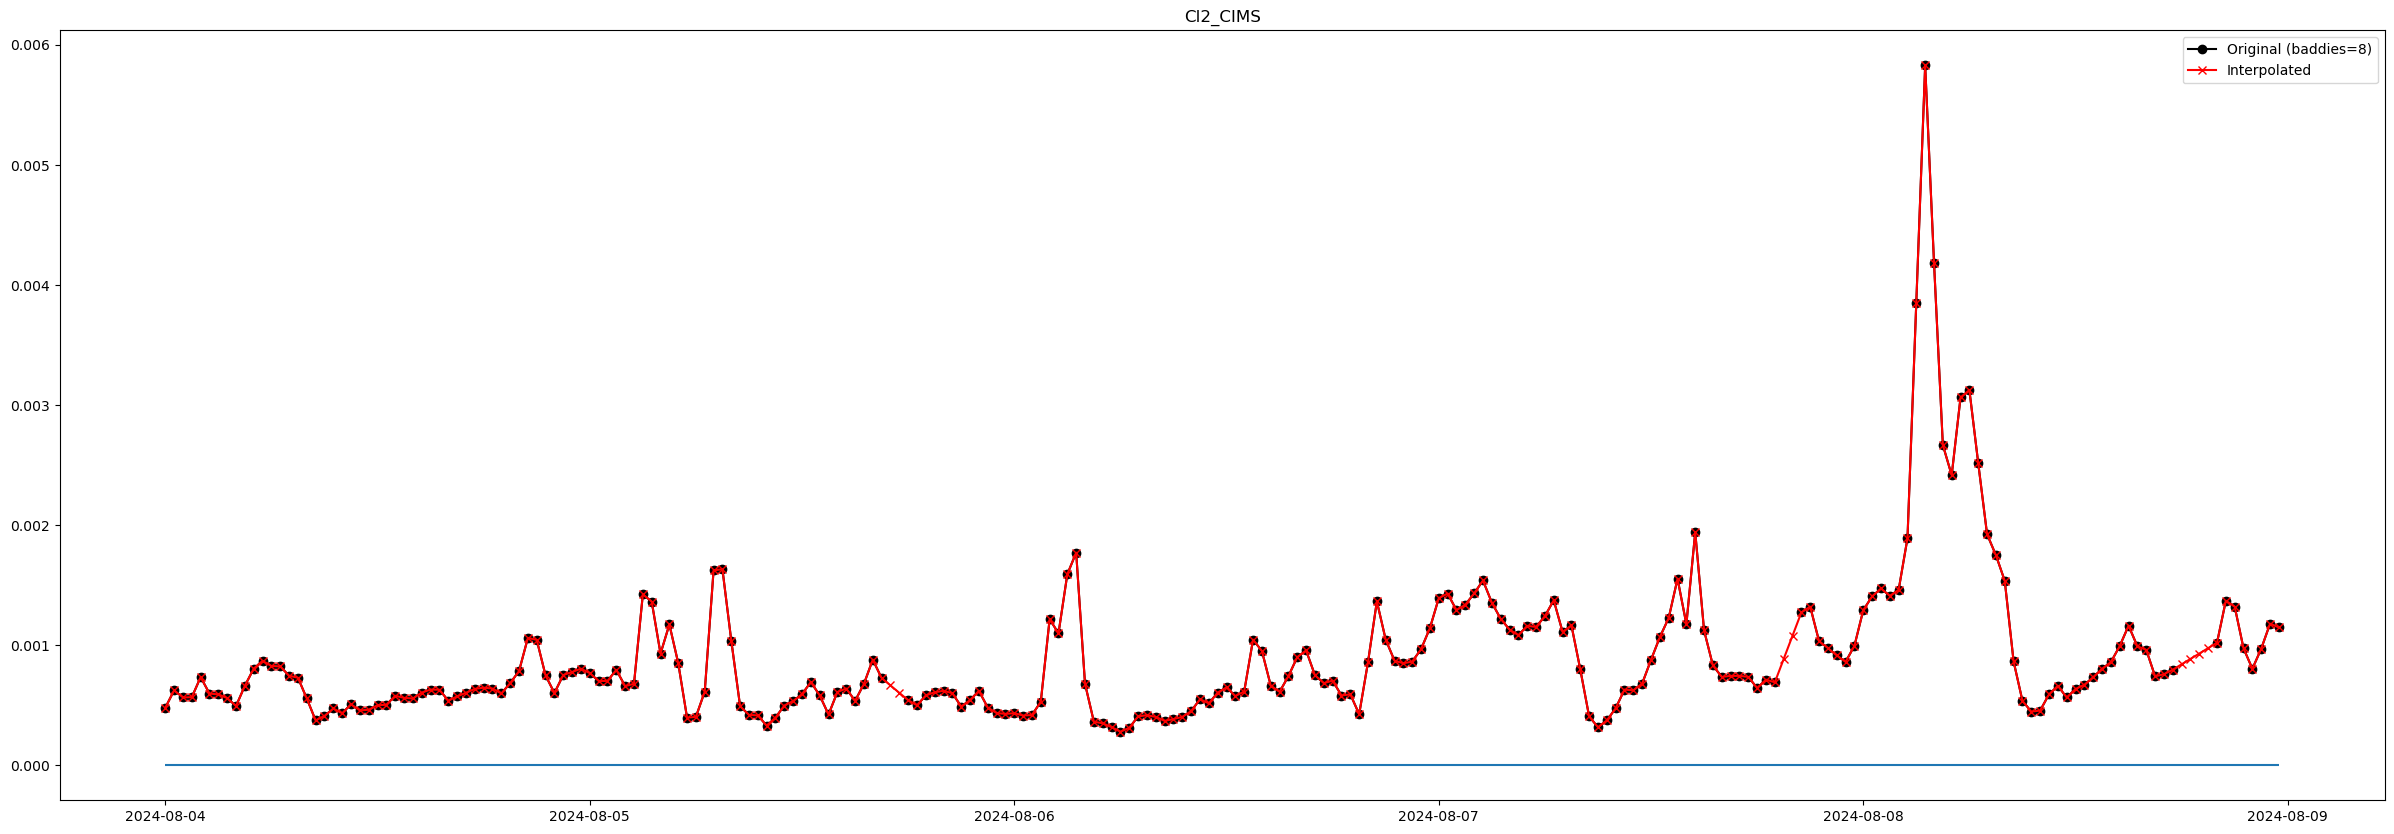

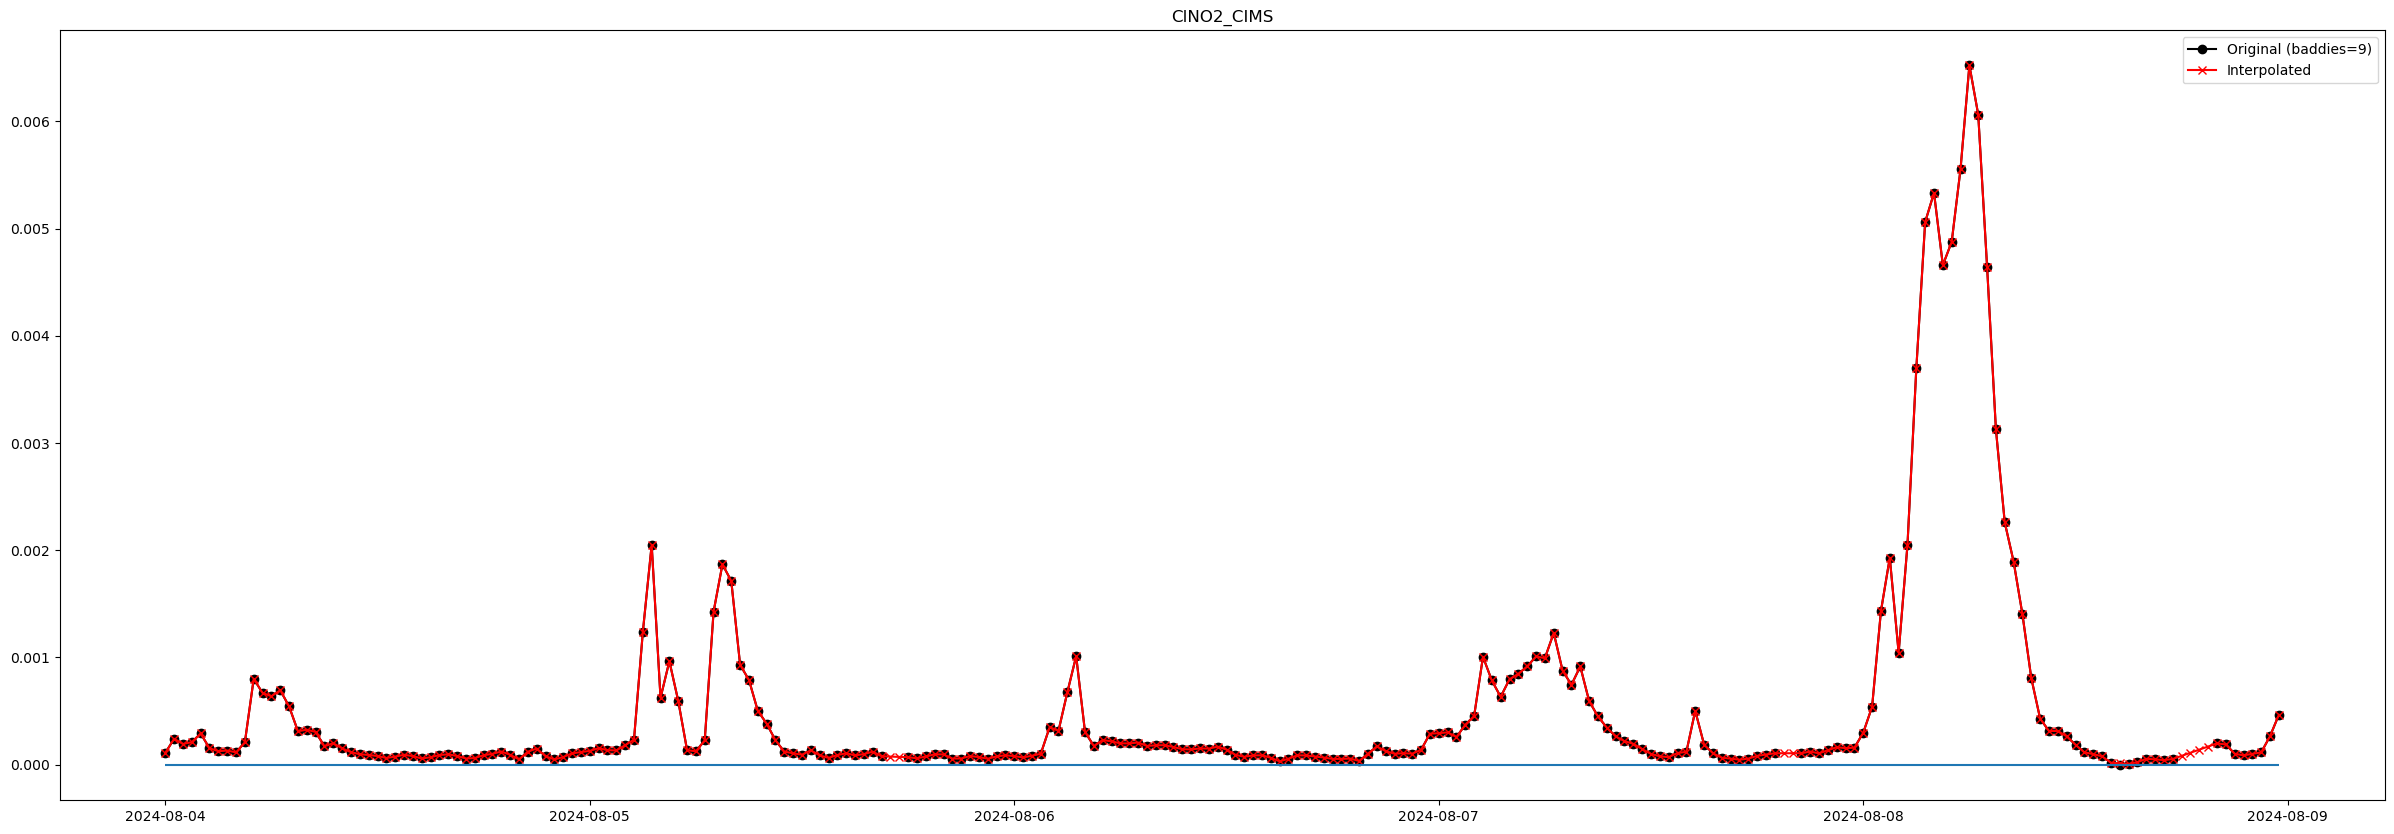

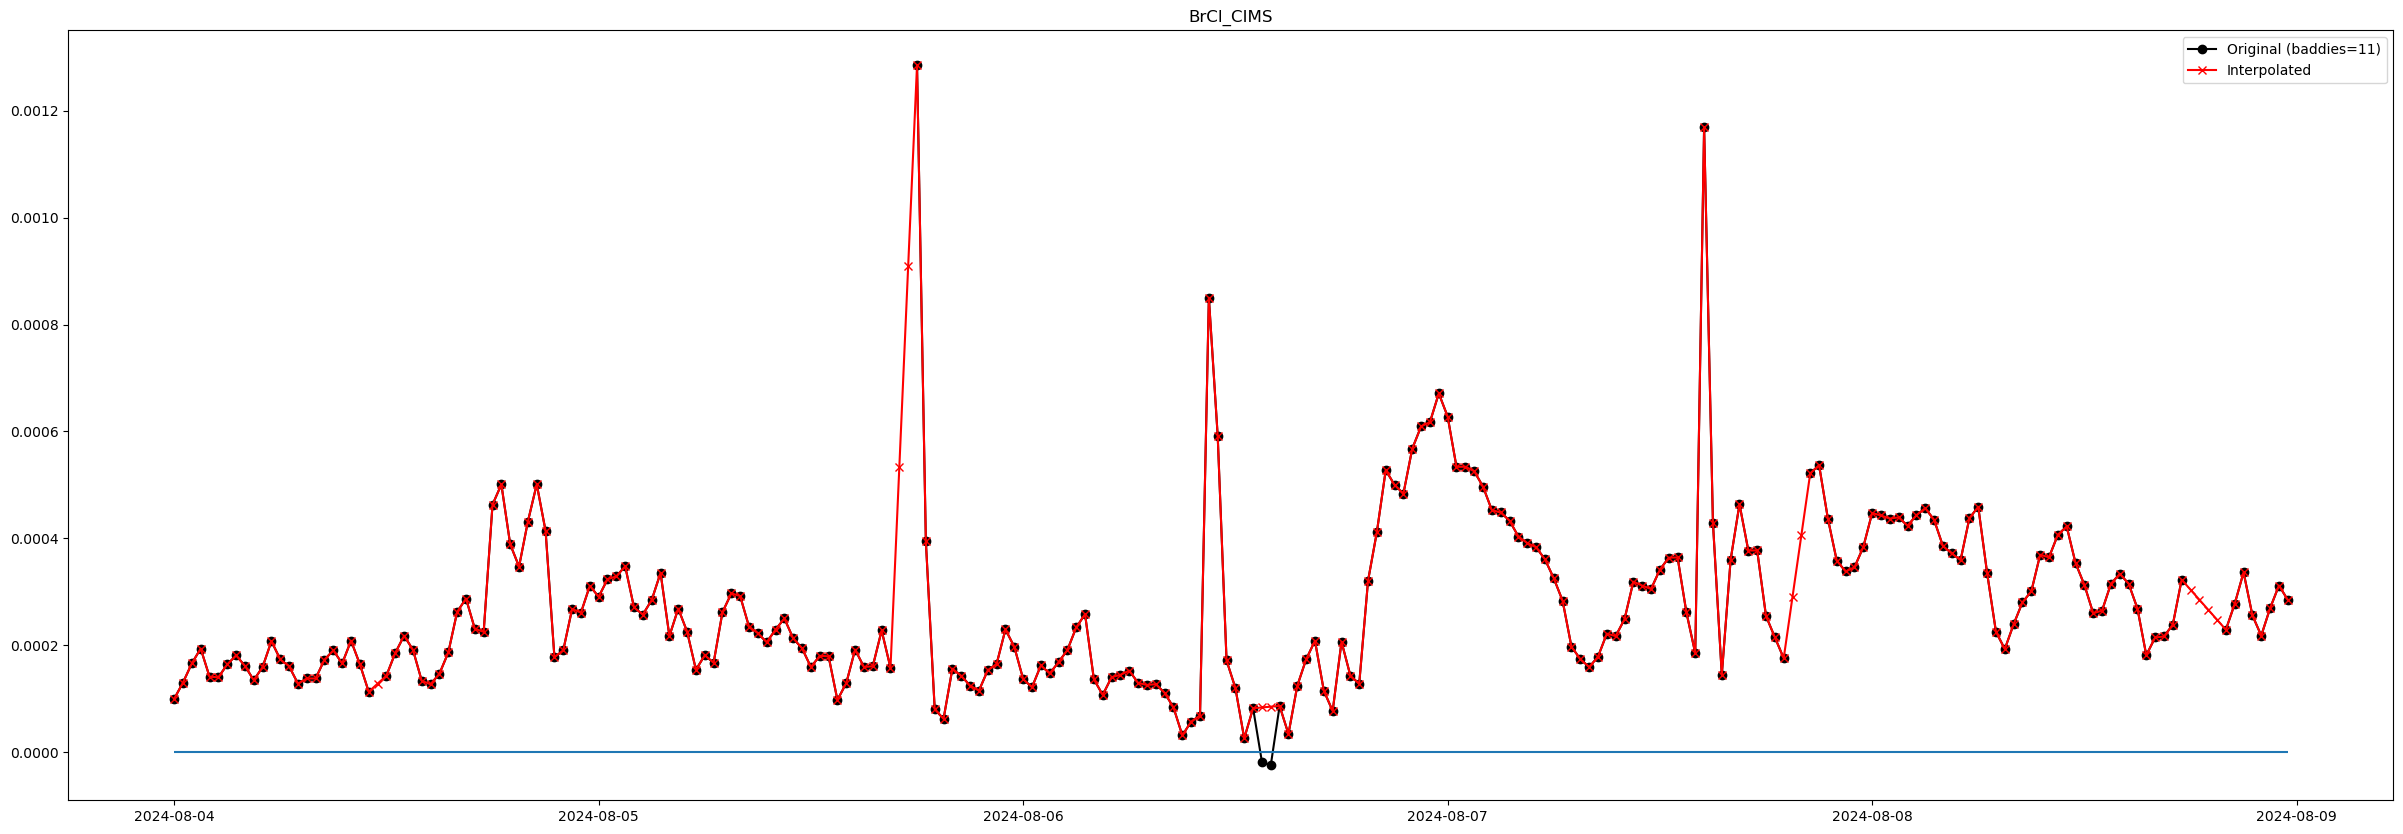

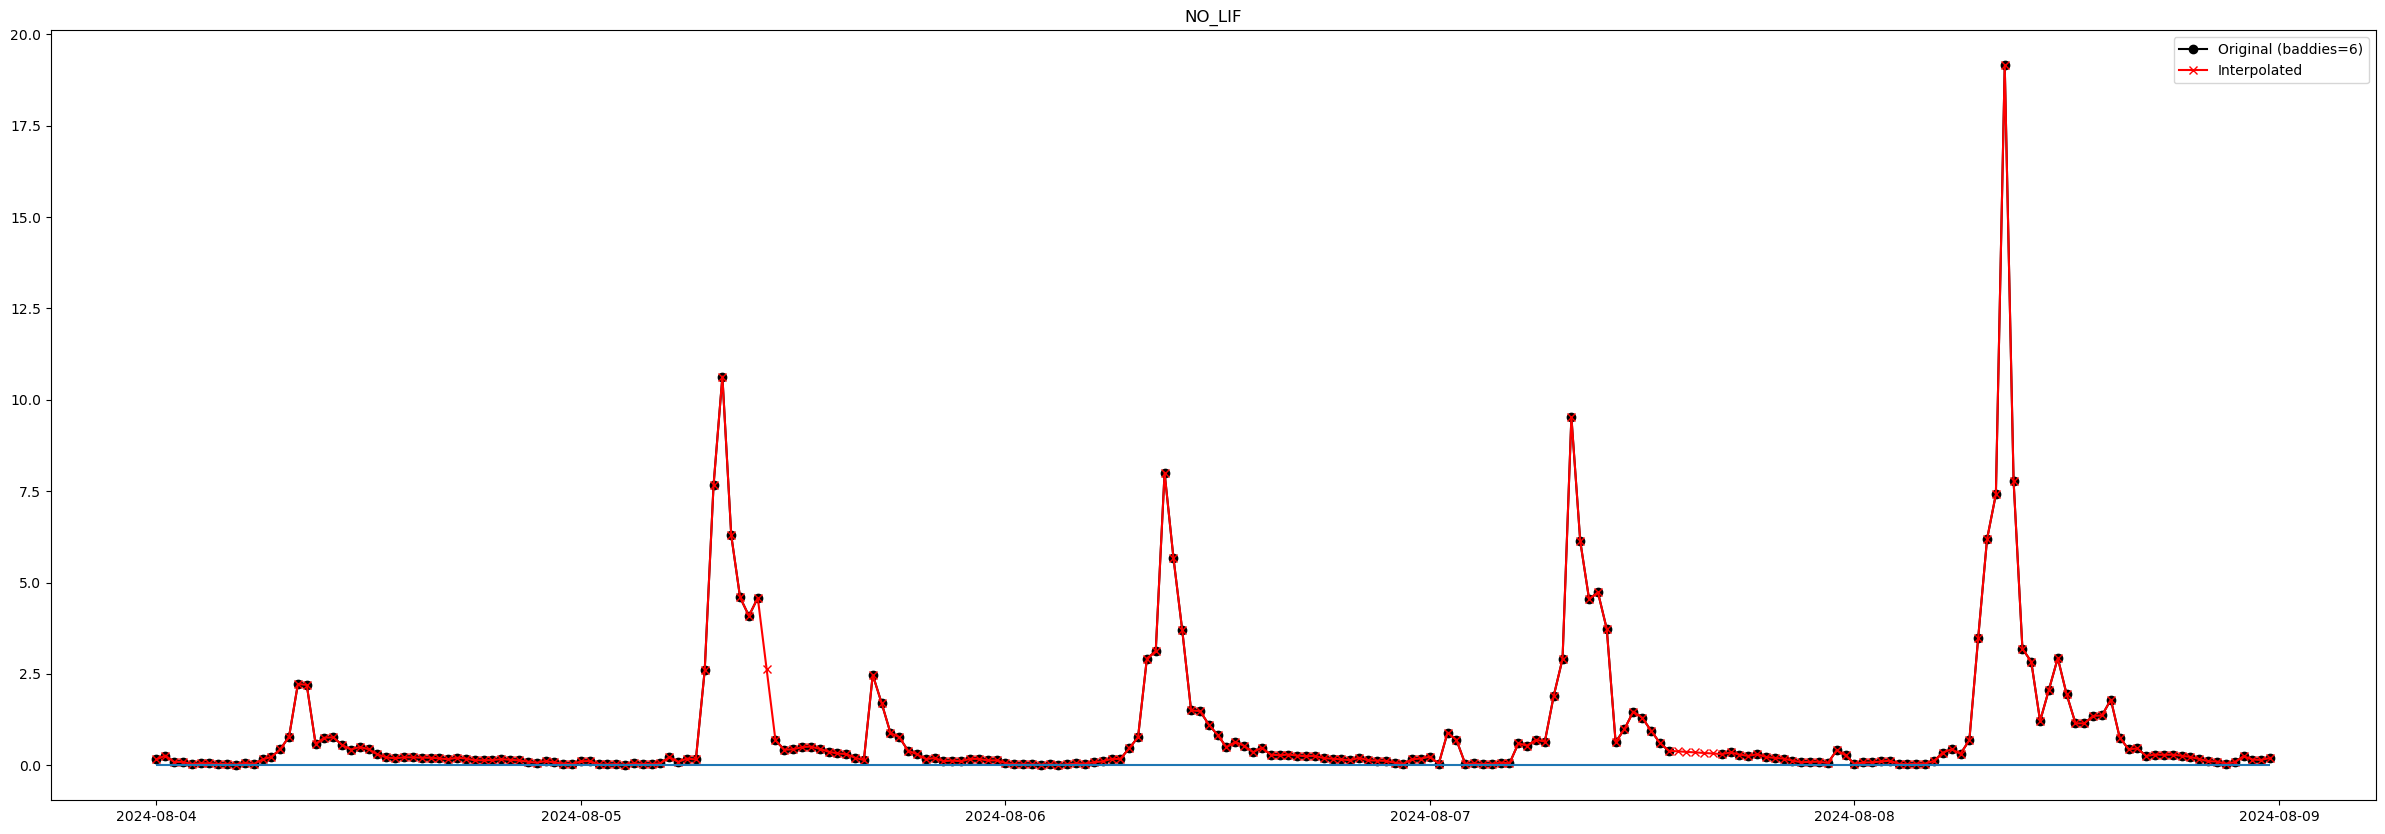

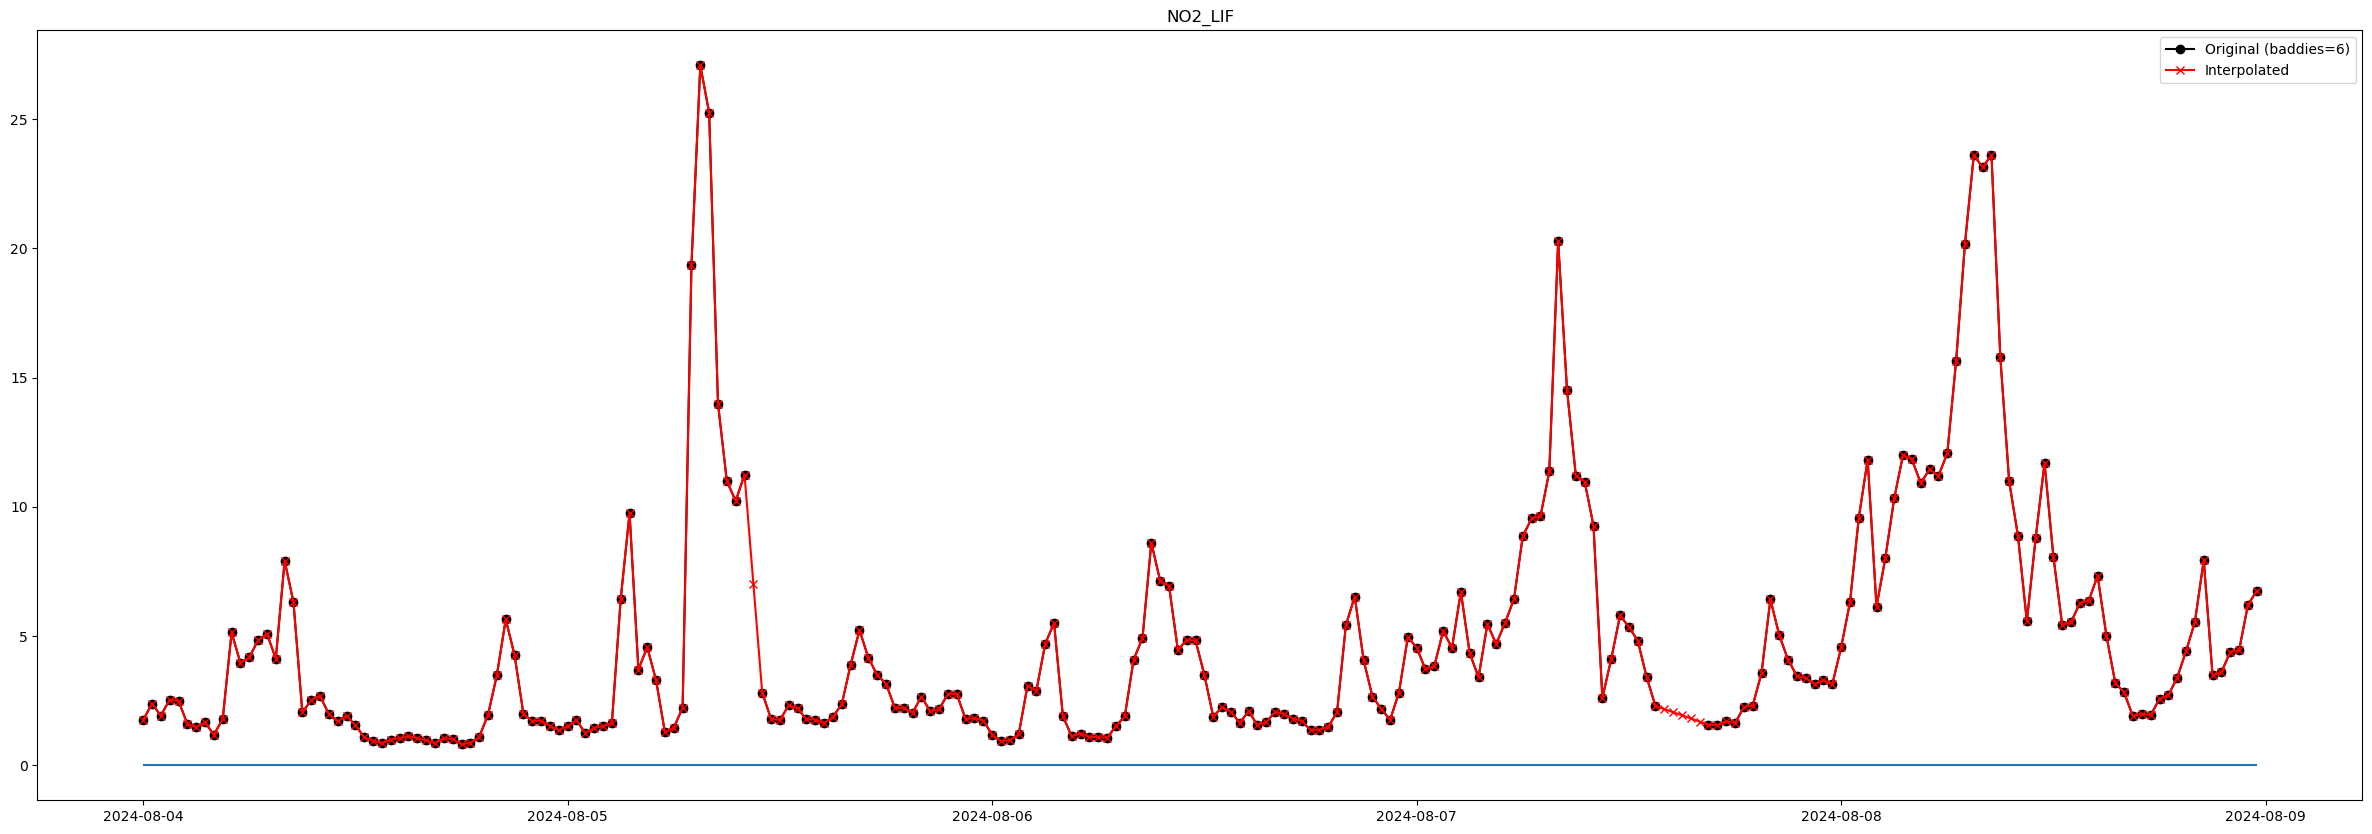

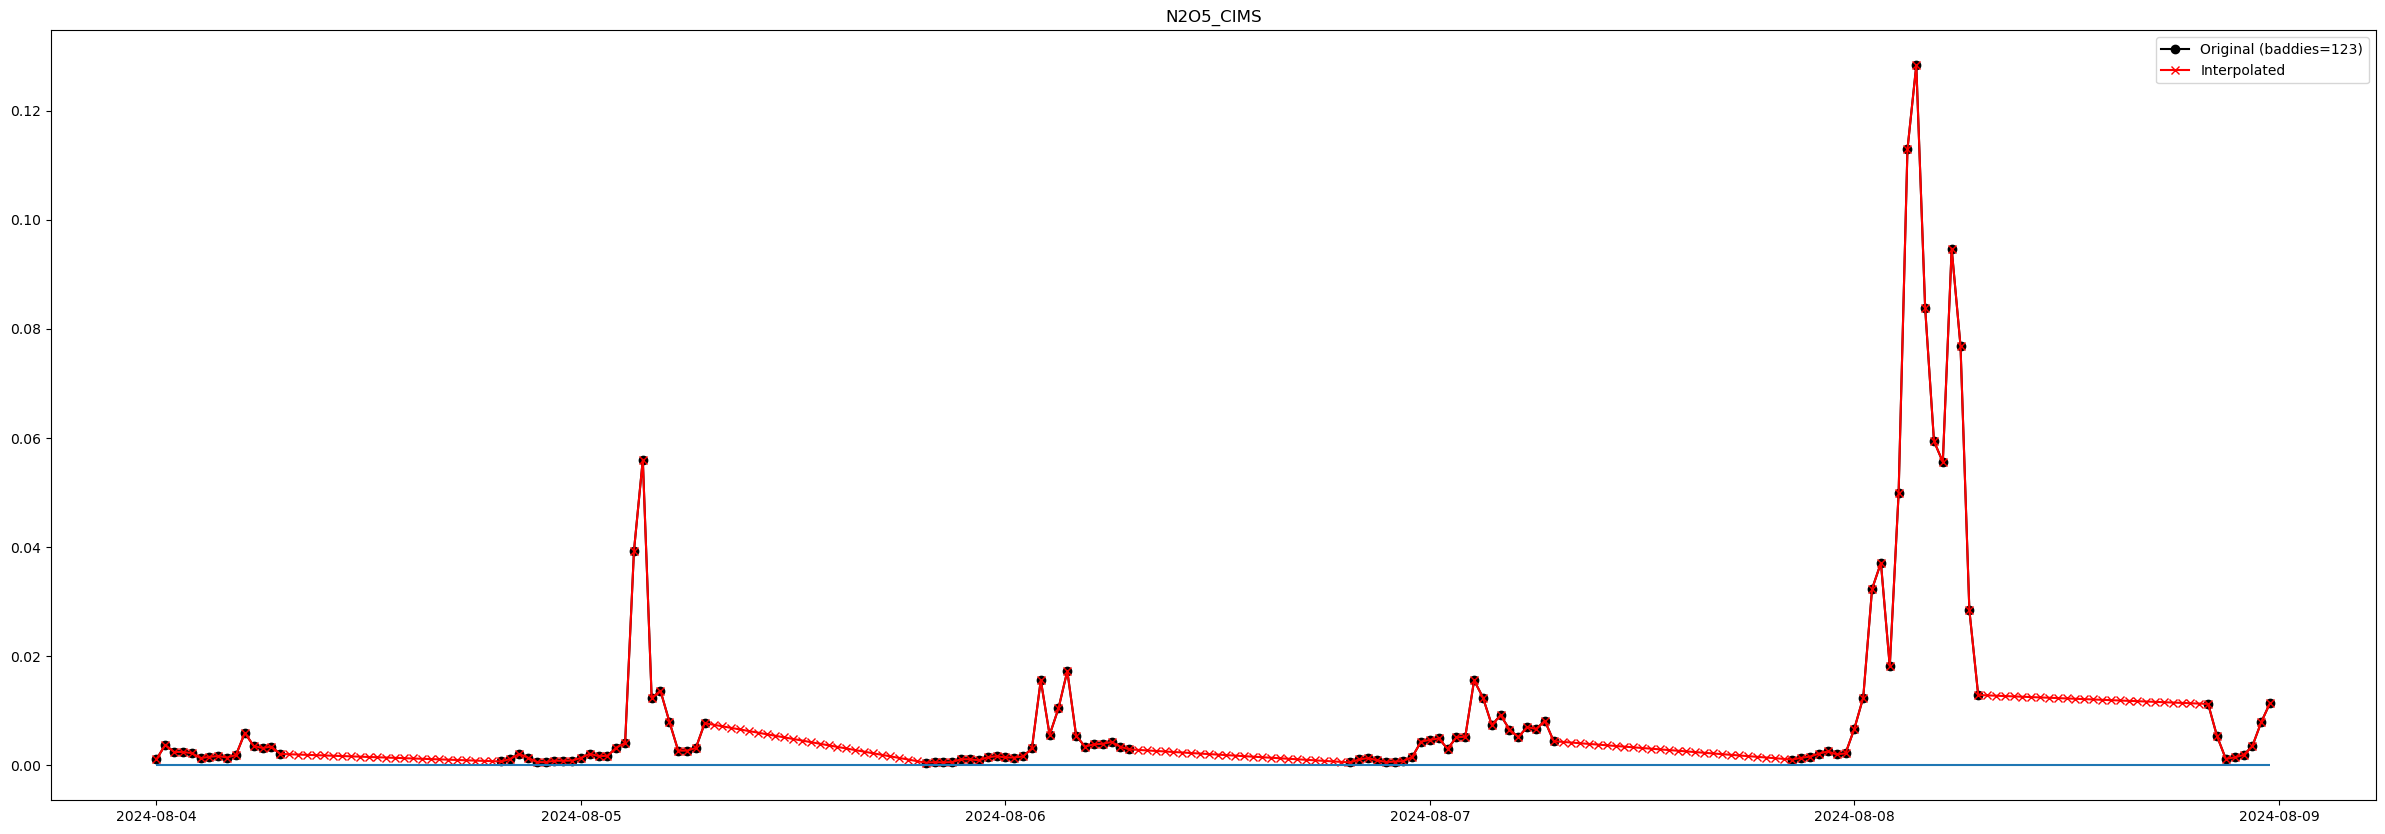

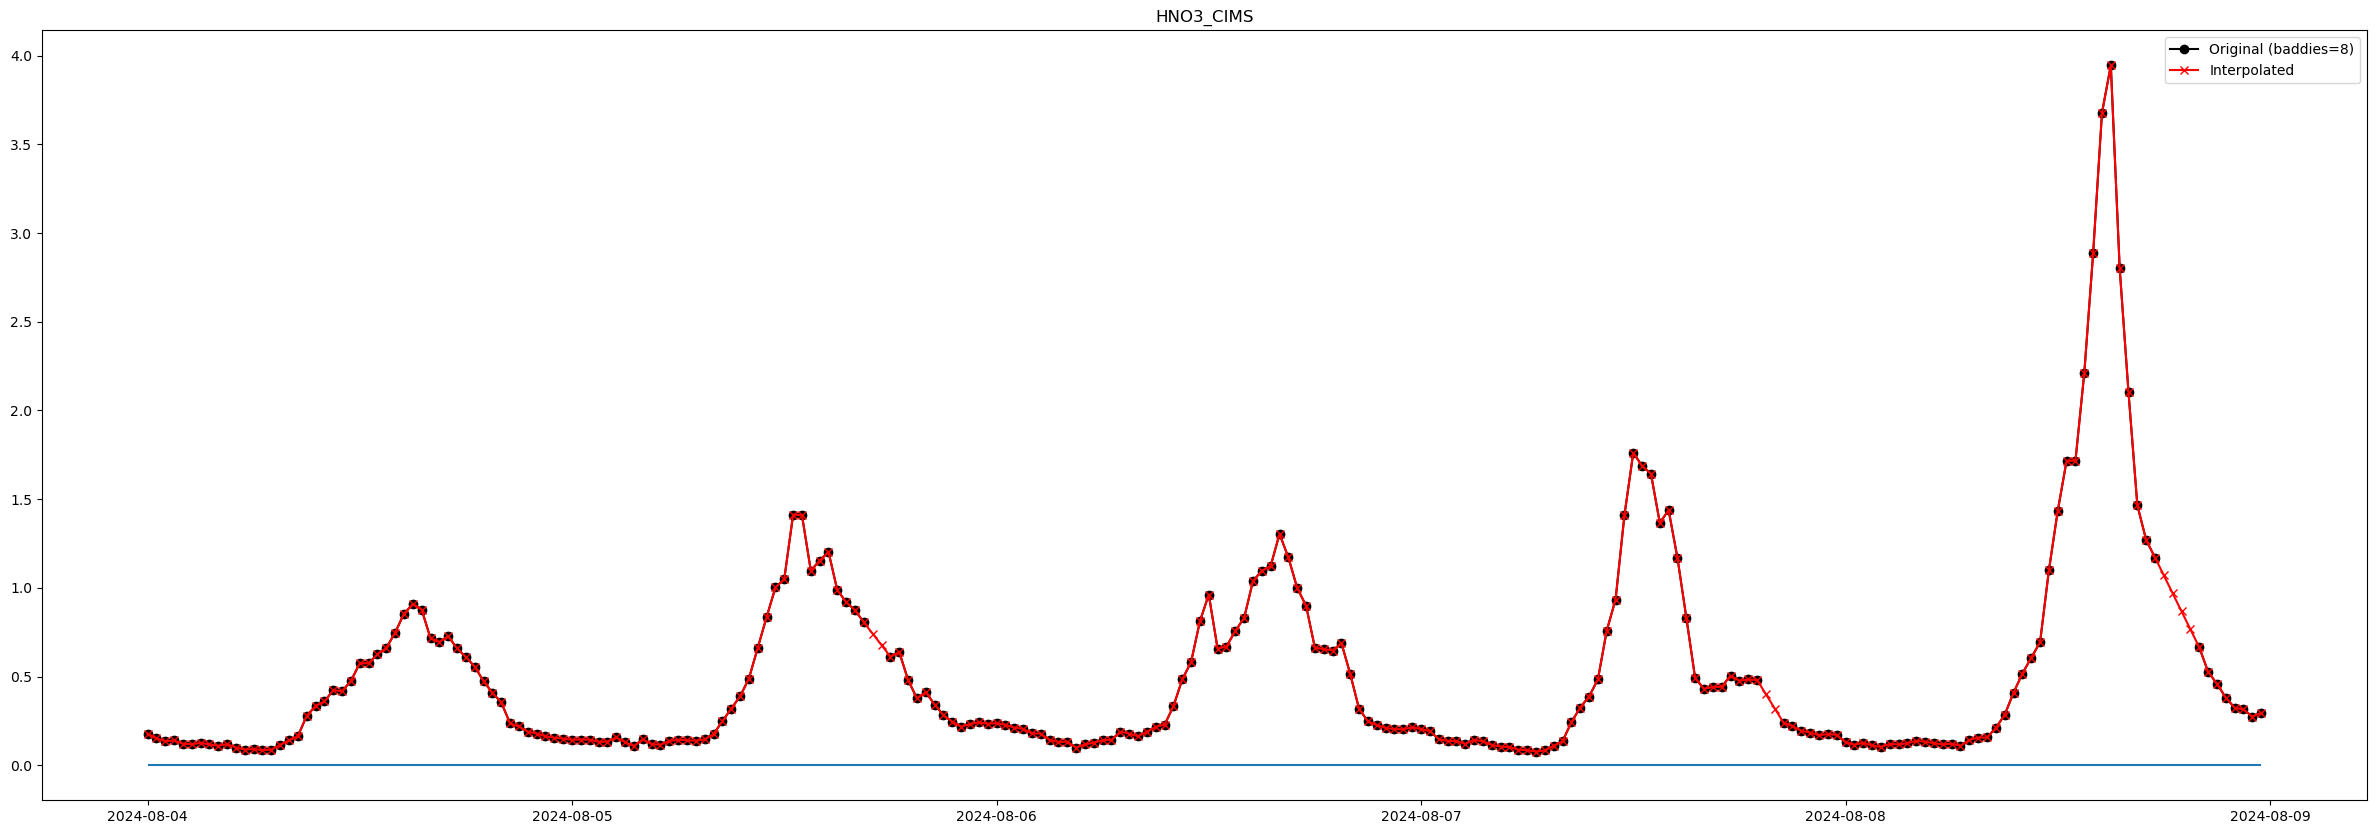

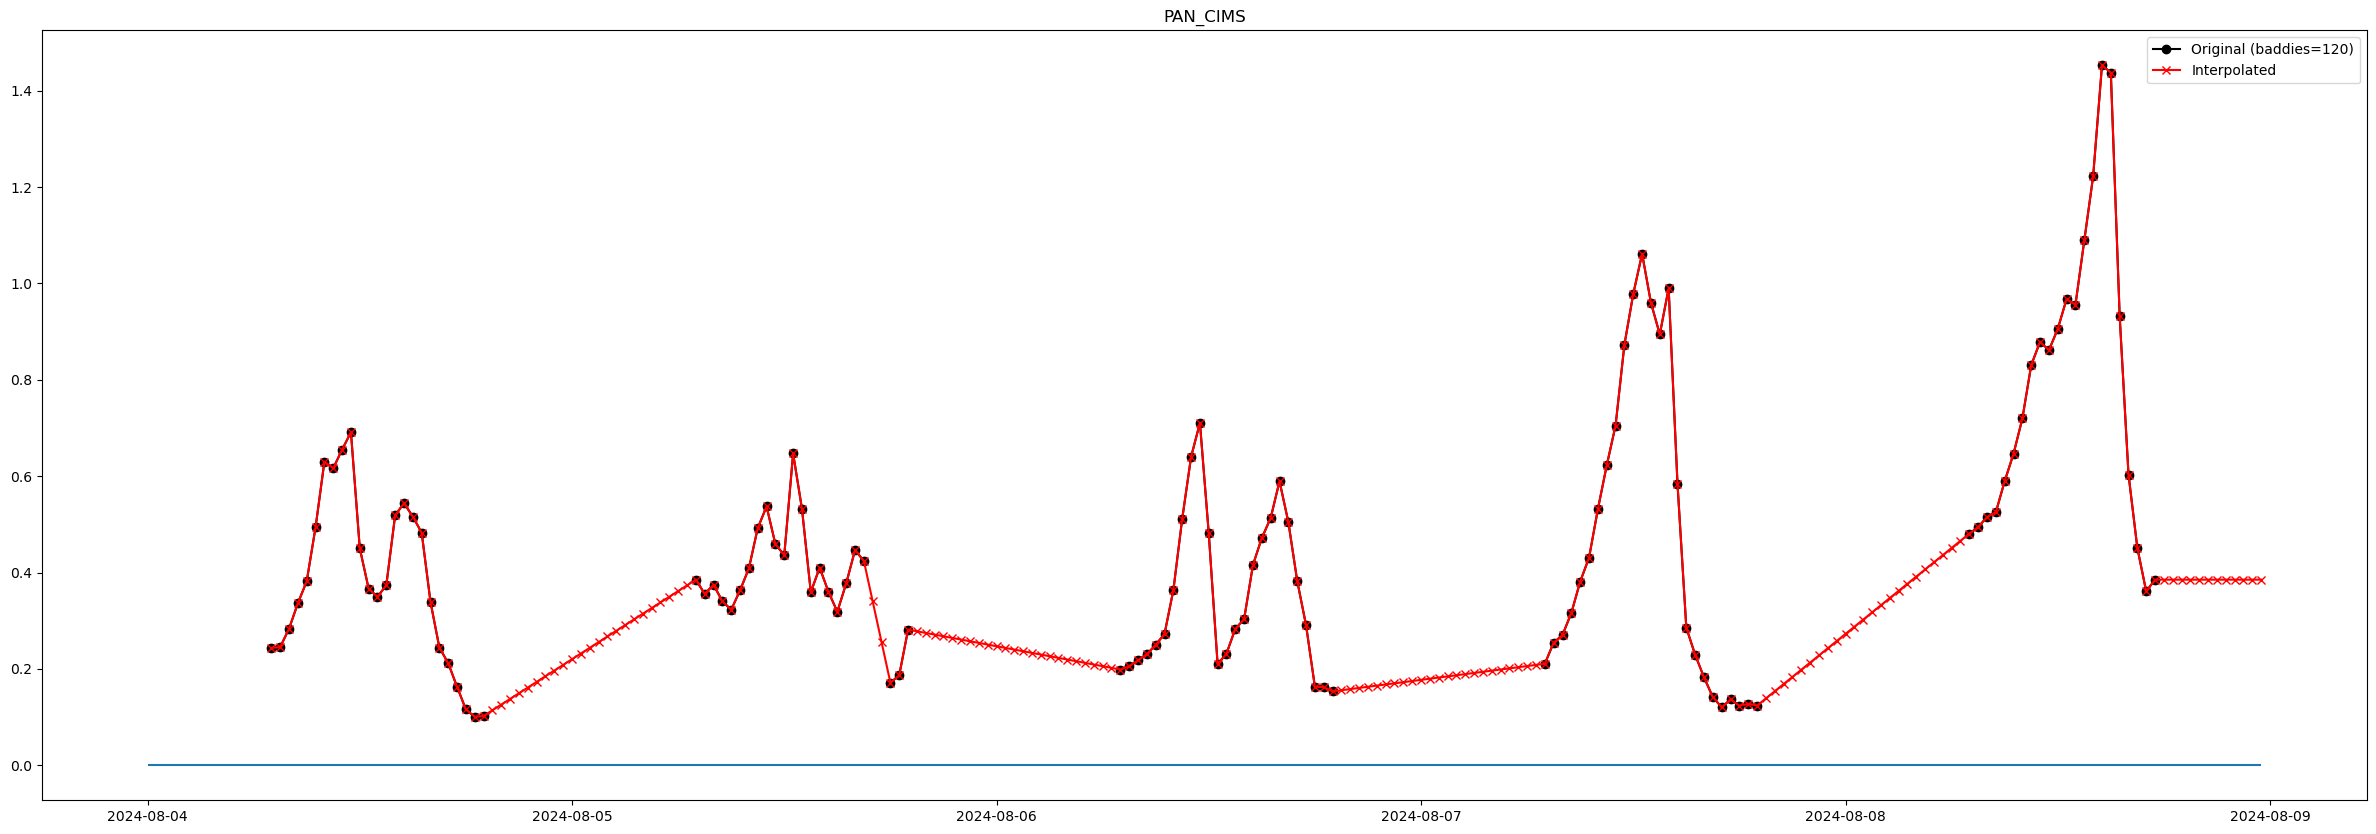

In [20]:
fixed_ct=0; 
df_interp=df_smokefree.copy()

for i,col in enumerate(vars2fill):
    # Set any negative values to NaN so we can iterp them... 
    df_interp[col] = df_interp[col].mask(df_interp[col] < 0, np.nan)
                               
    # Calc number of points that are negative or Nans: 
    n_baddies= len([item for item in df_smokefree[col] if item <0 or np.isnan(item)])                    
    if n_baddies > 0: 
        if fixed_ct<10: 
            #apply the linear interpolation
            df_interp[col] = df_interp[col].interpolate(method='linear')
            #Plot it so we can take a look at it... 
            fig, ax = plt.subplots(figsize = (30,10))
            plt.plot(df_smokefree.index, df_smokefree[col], color='k', marker='o',label=f'Original (baddies={n_baddies})')
            plt.plot(df_interp.index, df_interp[col], color='r', marker='x', label='Interpolated')
            plt.legend()
            plt.title(col)
            
            plt.hlines(y=0, xmin = df_interp.index[0], xmax = df_interp.index[239])
            # ax.set_xticks(range(0,len(df_smokefree.index),2))
            # labels=df_smokefree.index.strftime('%H')[0::2])
            # plt.yticks(ticks=np.arange(len(df_transposed_smokefree.index)), labels=df_transposed_smokefree.index)
            # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))
            # ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
            # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
            # ax.set_title(col)
            
            # Define start and end times for the plot
            # start_time = df.index.min().replace(hour=0, minute=0, second=0, microsecond=0)
            # end_time = df.index.min().replace(hour=23, minute=30, second=0, microsecond=0)
            # start_time = 
            # end_time = 
            # #Set x-axis limits
            # ax.set_xlim(start_time, end_time)
            plt.show()
        fixed_ct=fixed_ct+1